<a href="https://colab.research.google.com/github/ARJ014/Algorithmic-Trading/blob/main/Trading_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algo-1

In [2]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=d0bcf21dfb0f09d39204d566934c766968888fba69a8c68b1a38905b7c301bf2
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [3]:
from statsmodels.regression.rolling import RollingOLS
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import statsmodels.api as sm
import numpy as np
import datetime as dt
import yfinance as yf
import warnings
import pandas_ta
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [4]:
sp500=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [5]:
sp500['Symbol']=sp500['Symbol'].str.replace('.','-')
symbols_list=sp500['Symbol'].unique().tolist()
# symbols_list.remove('VLTO')

In [6]:
nifty=pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2]
symbols_list2=nifty['Symbol'].unique().tolist()
symbols_list2

['ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'LTIM',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SBIN',
 'SUNPHARMA',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TATACONSUM',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'UPL',
 'WIPRO']

In [7]:
end_date='2024-02-4'
start_date=pd.to_datetime(end_date)-pd.DateOffset(365*8)
start_date

Timestamp('2016-02-06 00:00:00')

In [8]:
df=yf.download(
    tickers=symbols_list,
    start=start_date,
    end=end_date
    ).stack()

[*********************100%%**********************]  503 of 503 completed


In [9]:
df.index.names=['date','ticker']
df.columns=df.columns.str.lower()
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-02-08 A        32.614361   34.799999   35.779999   34.389999   35.610001   
           AAL      34.065895   35.549999   36.160000   34.759998   36.080002   
           AAPL     21.741446   23.752501   23.924999   23.260000   23.282499   
           ABBV     37.472294   52.889999   54.099998   51.939999   52.580002   
           ABT      32.294937   37.459999   37.639999   36.689999   37.189999   
...                       ...         ...         ...         ...         ...   
2024-02-02 YUM     128.750000  128.750000  130.039993  127.690002  129.639999   
           ZBH     126.320000  126.320000  127.400002  125.599998  126.910004   
           ZBRA    246.479996  246.479996  247.940002  237.059998  240.210007   
           ZION     39.650002   39.650002   39.810001   37.959999   38.099998   
           ZTS     189.039993  189.039993  190.179993  185.619995  187.389999   

Price                   volume  
date       ticker               
2016-02-08 A         3888600.0  
           AAL      12821900.0  
           AAPL    216085600.0  
           ABBV      9369400.0  
           ABT       7802000.0  
...                        ...  
2024-02-02 YUM       1823800.0  
           ZBH       1058500.0  
           ZBRA       418600.0  
           ZION      6329600.0  
           ZTS       1177700.0  

[994485 rows x 6 columns]

### Calcualting features and technincal indicators for each stock


*   Garman klass volatility
*   RSI
*   Bollinger bands
*   ATR
*   MACD
*   Dollar Volume



In [10]:
df['garman_klass_volatility']=((np.log(df['high'])-np.log(df['low']))**2)/2 - (2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)
df['rsi']=df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x,length=20))

In [11]:
df['bb_low']=df.groupby(level=1)['adj close'].apply(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20)).iloc[:,0]
df['bb_mid']=df.groupby(level=1)['adj close'].apply(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20)).iloc[:,1]
df['bb_high']=df.groupby(level=1)['adj close'].apply(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20)).iloc[:,2]

In [12]:
# # Function to calculate Bollinger Bands
# def compute_bbands(close_prices):
#     bbands = pandas_ta.bbands(close=np.log1p(close_prices), length=20)
#     # The columns will be ['BBL', 'BBM', 'BBU', 'BBB', 'BBP'] by default
#     return bbands

# # Initialize lists to store Bollinger Bands
# bb_lows = []
# bb_mids = []
# bb_highs = []

# # Calculate Bollinger Bands for each group
# for name, group in df.groupby(level='ticker'):
#     bbands = compute_bbands(group['adj close'])
#     # Assuming 'bbands' DataFrame has the same index as 'group'
#     bb_lows.extend(bbands['BBL_20_2.0'])
#     bb_mids.extend(bbands['BBM_20_2.0'])
#     bb_highs.extend(bbands['BBU_20_2.0'])

# # Assign the results back to the DataFrame
# df['bb_low'] = bb_lows
# df['bb_mid'] = bb_mids
# df['bb_high'] = bb_highs
# # df.head(3)
# df

In [13]:
def compute_atr(x):
  atr=pandas_ta.atr(high=x['high'],low=x['low'],close=x['close'], length=14)
  return atr.sub(atr.mean()).div(atr.std())

df['atr']= df.groupby(level='ticker',group_keys=False).apply(compute_atr)

In [14]:
def compute_macd(x):
  macd=pandas_ta.macd(close=x,length=20).iloc[:,0]
  return macd.sub(macd.mean()).div(macd.std())

df['macd']=df.groupby(level='ticker',group_keys=False)['adj close'].apply(compute_macd)

In [15]:
df['dollar_volume']=df['adj close']*df['volume']/1e6

In [16]:
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-02-08 A        32.614361   34.799999   35.779999   34.389999   35.610001   
           AAL      34.065895   35.549999   36.160000   34.759998   36.080002   
           AAPL     21.741446   23.752501   23.924999   23.260000   23.282499   
           ABBV     37.472294   52.889999   54.099998   51.939999   52.580002   
           ABT      32.294937   37.459999   37.639999   36.689999   37.189999   
...                       ...         ...         ...         ...         ...   
2024-02-02 YUM     128.750000  128.750000  130.039993  127.690002  129.639999   
           ZBH     126.320000  126.320000  127.400002  125.599998  126.910004   
           ZBRA    246.479996  246.479996  247.940002  237.059998  240.210007   
           ZION     39.650002   39.650002   39.810001   37.959999   38.099998   
           ZTS     189.039993  189.039993  190.179993  185.619995  187.389999   

Price                   volume  garman_klass_volatility        rsi    bb_low  \
date       ticker                                                              
2016-02-08 A         3888600.0                -0.002198        NaN       NaN   
           AAL      12821900.0                -0.000495        NaN       NaN   
           AAPL    216085600.0                -0.001414        NaN       NaN   
           ABBV      9369400.0                -0.043494        NaN       NaN   
           ABT       7802000.0                -0.007367        NaN       NaN   
...                        ...                      ...        ...       ...   
2024-02-02 YUM       1823800.0                 0.000148  49.062312  4.856886   
           ZBH       1058500.0                 0.000093  64.934995  4.790665   
           ZBRA       418600.0                 0.000750  48.173277  5.481656   
           ZION      6329600.0                 0.000518  44.684089  3.699349   
           ZTS       1177700.0                 0.000265  49.434320  5.224122   

Price                bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2016-02-08 A            NaN       NaN       NaN       NaN     126.824203  
           AAL          NaN       NaN       NaN       NaN     436.789500  
           AAPL         NaN       NaN       NaN       NaN    4698.013305  
           ABBV         NaN       NaN       NaN       NaN     351.092910  
           ABT          NaN       NaN       NaN       NaN     251.965100  
...                     ...       ...       ...       ...            ...  
2024-02-02 YUM     4.873482  4.890078  0.237374  0.001663     234.814250  
           ZBH     4.818914  4.847164 -0.488922  0.609520     133.709720  
           ZBRA    5.529192  5.576728  0.145062 -0.286543     103.176526  
           ZION    3.777674  3.856000  0.864130 -0.100932     250.968650  
           ZTS     5.261216  5.298310  0.767381 -0.426495     222.632400  

[994485 rows x 14 columns]

## Aggregate Monthly level for 150 top stocks

In [17]:
last_cols=[c for c in df.columns.unique() if c not in ['dollar_volume','volume','high','low','close','open']]
data=pd.concat(
    [df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
     df.unstack()[last_cols].resample('M').last().stack('ticker')]
    ,axis=1).dropna()
data

dollar_volume   adj close       atr   bb_high    bb_low  \
date       ticker                                                            
2016-03-31 A           62.013609   37.347191 -1.155184  3.665222  3.598942   
           AAL        298.909251   39.297951  0.081142  3.753792  3.680381   
           AAPL      3235.327765   24.940536 -1.114748  3.263829  3.168778   
           ABBV       256.185605   40.469227 -1.002559  3.735461  3.690339   
           ABT        229.241218   36.062397 -1.159154  3.619339  3.532534   
...                          ...         ...       ...       ...       ...   
2024-02-29 YUM        211.376780  128.750000  0.237374  4.890078  4.856886   
           ZBH        158.124922  126.320000 -0.488922  4.847164  4.790665   
           ZBRA       109.096595  246.479996  0.145062  5.576728  5.481656   
           ZION       288.471912   39.650002  0.864130  3.856000  3.699349   
           ZTS        261.133994  189.039993  0.767381  5.298310  5.224122   

                     bb_mid  garman_klass_volatility      macd        rsi  
date       ticker                                                          
2016-03-31 A       3.632082                -0.001771  0.190572  61.494927  
           AAL     3.717086                -0.001005  0.666253  53.080502  
           AAPL    3.216304                -0.003453  0.051734  73.588954  
           ABBV    3.712900                -0.045347  0.013845  56.837566  
           ABT     3.575936                -0.007947  0.377243  70.373651  
...                     ...                      ...       ...        ...  
2024-02-29 YUM     4.873482                 0.000148  0.001663  49.062312  
           ZBH     4.818914                 0.000093  0.609520  64.934995  
           ZBRA    5.529192                 0.000750 -0.286543  48.173277  
           ZION    3.777674                 0.000518 -0.100932  44.684089  
           ZTS     5.261216                 0.000265 -0.426495  49.434320  

[47476 rows x 9 columns]

In [18]:
data['dollar_volume'] =(data['dollar_volume'].unstack('ticker').rolling(5*12,min_periods=12).mean().stack())
data['dollar_volume_rank']=data.groupby('date')['dollar_volume'].rank(ascending=False)

data=data[data['dollar_volume_rank']<=150].drop(['dollar_volume_rank','dollar_volume'],axis=1)
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2017-02-28 AAL      44.898853  0.241235  3.864723  3.767394  3.816059   
           AAPL     32.010567 -1.189393  3.528788  3.405187  3.466988   
           ABBV     45.488472 -1.520161  3.847692  3.810369  3.829030   
           ABT      39.848408 -1.273715  3.734055  3.624358  3.679207   
           ACN     109.569901 -1.106769  4.731512  4.614227  4.672869   
...                       ...       ...       ...       ...       ...   
2024-02-29 VRTX    424.679993  1.271697  6.102493  6.035105  6.068799   
           VZ       42.130001  0.039358  3.801870  3.646189  3.724029   
           WFC      49.160000 -0.095808  3.957063  3.853271  3.905167   
           WMT     169.570007  0.160282  5.134510  5.060651  5.097581   
           XOM     101.970001  0.360221  4.665701  4.567458  4.616580   

                   garman_klass_volatility      macd        rsi  
date       ticker                                                
2017-02-28 AAL                   -0.000264  0.090508  50.168991  
           AAPL                  -0.001782  0.184377  84.344921  
           ABBV                  -0.037405 -0.159372  53.680531  
           ABT                   -0.006505  0.659919  71.877203  
           ACN                   -0.004939  0.169466  63.223057  
...                                    ...       ...        ...  
2024-02-29 VRTX                   0.000073  1.808073  55.479647  
           VZ                     0.000114  2.609832  66.047980  
           WFC                    0.000408  0.651313  56.285441  
           WMT                    0.000096  1.518877  68.719276  
           XOM                    0.000155  0.269902  51.749501  

[12750 rows x 8 columns]

## Calculating monthly return for different time horizons as features

In [19]:
def calculate_return(df):

  lags=[1,2,3,6,9,12]
  outlier_cutoff=0.005

  for lag in lags:
    df[f'return_{lag}M']=df['adj close'].pct_change(lag).pipe(
        lambda x: x.clip(lower=x.quantile(outlier_cutoff),upper=x.quantile(1-outlier_cutoff))
    ).add(1).pow(1/lag).sub(1)
  return df

data=data.groupby(level=1,group_keys=False).apply(calculate_return).dropna()
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2018-02-28 AAL      52.977325  1.368837  4.015218  3.875603  3.945411   
           AAPL     42.279884 -0.792852  3.795134  3.617069  3.706102   
           ABBV     88.056595  1.936506  4.539666  4.420361  4.480013   
           ABT      54.474930 -0.604301  4.051457  3.947487  3.999472   
           ACN     146.918533 -0.514960  5.030859  4.932437  4.981648   
...                       ...       ...       ...       ...       ...   
2024-02-29 VRTX    424.679993  1.271697  6.102493  6.035105  6.068799   
           VZ       42.130001  0.039358  3.801870  3.646189  3.724029   
           WFC      49.160000 -0.095808  3.957063  3.853271  3.905167   
           WMT     169.570007  0.160282  5.134510  5.060651  5.097581   
           XOM     101.970001  0.360221  4.665701  4.567458  4.616580   

                   garman_klass_volatility      macd        rsi  return_1M  \
date       ticker                                                            
2018-02-28 AAL                   -0.000118  0.431611  55.685264   0.000632   
           AAPL                  -0.001207 -0.023588  59.836089   0.068185   
           ABBV                  -0.034391  1.158850  56.507200   0.032169   
           ABT                   -0.004361 -0.047956  55.823950  -0.029440   
           ACN                   -0.003895  0.104424  54.875627   0.001929   
...                                    ...       ...        ...        ...   
2024-02-29 VRTX                   0.000073  1.808073  55.479647  -0.020075   
           VZ                     0.000114  2.609832  66.047980  -0.005195   
           WFC                    0.000408  0.651313  56.285441  -0.013446   
           WMT                    0.000096  1.518877  68.719276   0.026142   
           XOM                    0.000155  0.269902  51.749501  -0.008170   

                   return_2M  return_3M  return_6M  return_9M  return_12M  
date       ticker                                                          
2018-02-28 AAL      0.022092   0.024888   0.033351   0.013426    0.013883  
           AAPL     0.028019   0.013390   0.015155   0.018521    0.023458  
           ABBV     0.098315   0.063744   0.076940   0.065844    0.050362  
           ABT      0.030620   0.024517   0.030254   0.033180    0.026397  
           ACN      0.025541   0.028460   0.036957   0.030116    0.024744  
...                      ...        ...        ...        ...         ...  
2024-02-29 VRTX     0.021627   0.061749   0.033578   0.030674    0.032213  
           VZ       0.065998   0.037779   0.038009   0.025105    0.012923  
           WFC      0.002894   0.035471   0.032231   0.026413    0.006798  
           WMT      0.037116   0.030148   0.007632   0.016916    0.016100  
           XOM      0.009903  -0.002504  -0.012827   0.001691   -0.004081  

[10564 rows x 14 columns]

## Download Fama-French Factors and Calculate Rolling Factor Betas.
* We will introduce the Fama-French data to estimate the exposure of assets to common risk factors using linear regression.
*The five Fama-French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset
returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in
models.
*We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling

In [20]:
factor_data=web.DataReader('F-F_Research_Data_5_Factors_2x3',
               'famafrench',
               start='2010')[0].drop('RF',axis=1)
factor_data.index=factor_data.index.to_timestamp()
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-01-01,-3.36,0.34,0.43,-1.27,0.46
2010-02-01,3.40,1.51,3.23,-0.27,1.43
2010-03-01,6.31,1.85,2.21,-0.65,1.69
2010-04-01,2.00,4.98,2.89,0.69,1.72
2010-05-01,-7.89,0.04,-2.44,1.30,-0.21
...,...,...,...,...,...
2023-08-01,-2.39,-3.65,-1.06,3.43,-2.37
2023-09-01,-5.24,-1.80,1.52,1.86,-0.83
2023-10-01,-3.19,-4.04,0.19,2.46,-0.66


In [21]:
factor_data=factor_data.resample('M').last()
factor_data.index.name='date'
factor_data=factor_data.join(data['return_1M']).sort_index()
factor_data

Mkt-RF   SMB   HML   RMW   CMA  return_1M
date       ticker                                           
2018-02-28 AAL      -3.65  0.32 -1.04  0.52 -2.37   0.000632
           AAPL     -3.65  0.32 -1.04  0.52 -2.37   0.068185
           ABBV     -3.65  0.32 -1.04  0.52 -2.37   0.032169
           ABT      -3.65  0.32 -1.04  0.52 -2.37  -0.029440
           ACN      -3.65  0.32 -1.04  0.52 -2.37   0.001929
...                   ...   ...   ...   ...   ...        ...
2023-12-31 VRTX      4.85  7.32  4.94 -3.07  1.32   0.146783
           VZ        4.85  7.32  4.94 -3.07  1.32  -0.016436
           WFC       4.85  7.32  4.94 -3.07  1.32   0.103835
           WMT       4.85  7.32  4.94 -3.07  1.32   0.016350
           XOM       4.85  7.32  4.94 -3.07  1.32  -0.026864

[10273 rows x 6 columns]

### Filtering out data with less than 10 months of data

In [22]:
observations=factor_data.groupby(level=1).size()
valid_stocks=observations[observations>=10]
factor_data=factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF   SMB   HML   RMW   CMA  return_1M
date       ticker                                           
2018-02-28 AAL      -3.65  0.32 -1.04  0.52 -2.37   0.000632
           AAPL     -3.65  0.32 -1.04  0.52 -2.37   0.068185
           ABBV     -3.65  0.32 -1.04  0.52 -2.37   0.032169
           ABT      -3.65  0.32 -1.04  0.52 -2.37  -0.029440
           ACN      -3.65  0.32 -1.04  0.52 -2.37   0.001929
...                   ...   ...   ...   ...   ...        ...
2023-12-31 VRTX      4.85  7.32  4.94 -3.07  1.32   0.146783
           VZ        4.85  7.32  4.94 -3.07  1.32  -0.016436
           WFC       4.85  7.32  4.94 -3.07  1.32   0.103835
           WMT       4.85  7.32  4.94 -3.07  1.32   0.016350
           XOM       4.85  7.32  4.94 -3.07  1.32  -0.026864

[10240 rows x 6 columns]

### Caclucating rolling factors beta:

In [23]:
betas=(factor_data.groupby(level=1,group_keys=False
                     ).apply(lambda x: RollingOLS(
                         endog=x['return_1M'],
                         exog=sm.add_constant(x.drop('return_1M',axis=1)),
                         window=min(24,x.shape[0]),
                         min_nobs=len(x.columns)+1
                         ).fit(params_only=True
                               ).params.drop('const',axis=1)
                     ))
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2018-02-28 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-12-31 VRTX    0.003604  0.000091 -0.002916 -0.000244  0.007163
           VZ      0.004415 -0.006580  0.005298  0.001827 -0.002229
           WFC     0.010289  0.002004  0.019798 -0.002955 -0.014773
           WMT     0.005155  0.001936 -0.007562  0.006389  0.008183
           XOM     0.007381 -0.004678  0.010719  0.005236  0.003085

[10240 rows x 5 columns]

In [24]:
factors=["Mkt-RF",	"SMB"	,"HML",	"RMW"	,"CMA"]
data=data.join( betas.groupby('ticker').shift())
data.loc[:,factors]= data.groupby('ticker',group_keys=False)[factors].apply(lambda x:x.fillna(x.mean()))
data=data.drop('adj close',axis=1)
data

atr   bb_high    bb_low    bb_mid  \
date       ticker                                           
2018-02-28 AAL     1.368837  4.015218  3.875603  3.945411   
           AAPL   -0.792852  3.795134  3.617069  3.706102   
           ABBV    1.936506  4.539666  4.420361  4.480013   
           ABT    -0.604301  4.051457  3.947487  3.999472   
           ACN    -0.514960  5.030859  4.932437  4.981648   
...                     ...       ...       ...       ...   
2024-02-29 VRTX    1.271697  6.102493  6.035105  6.068799   
           VZ      0.039358  3.801870  3.646189  3.724029   
           WFC    -0.095808  3.957063  3.853271  3.905167   
           WMT     0.160282  5.134510  5.060651  5.097581   
           XOM     0.360221  4.665701  4.567458  4.616580   

                   garman_klass_volatility      macd        rsi  return_1M  \
date       ticker                                                            
2018-02-28 AAL                   -0.000118  0.431611  55.685264   0.000632   
           AAPL                  -0.001207 -0.023588  59.836089   0.068185   
           ABBV                  -0.034391  1.158850  56.507200   0.032169   
           ABT                   -0.004361 -0.047956  55.823950  -0.029440   
           ACN                   -0.003895  0.104424  54.875627   0.001929   
...                                    ...       ...        ...        ...   
2024-02-29 VRTX                   0.000073  1.808073  55.479647  -0.020075   
           VZ                     0.000114  2.609832  66.047980  -0.005195   
           WFC                    0.000408  0.651313  56.285441  -0.013446   
           WMT                    0.000096  1.518877  68.719276   0.026142   
           XOM                    0.000155  0.269902  51.749501  -0.008170   

                   return_2M  return_3M  return_6M  return_9M  return_12M  \
date       ticker                                                           
2018-02-28 AAL      0.022092   0.024888   0.033351   0.013426    0.013883   
           AAPL     0.028019   0.013390   0.015155   0.018521    0.023458   
           ABBV     0.098315   0.063744   0.076940   0.065844    0.050362   
           ABT      0.030620   0.024517   0.030254   0.033180    0.026397   
           ACN      0.025541   0.028460   0.036957   0.030116    0.024744   
...                      ...        ...        ...        ...         ...   
2024-02-29 VRTX     0.021627   0.061749   0.033578   0.030674    0.032213   
           VZ       0.065998   0.037779   0.038009   0.025105    0.012923   
           WFC      0.002894   0.035471   0.032231   0.026413    0.006798   
           WMT      0.037116   0.030148   0.007632   0.016916    0.016100   
           XOM      0.009903  -0.002504  -0.012827   0.001691   -0.004081   

                     Mkt-RF       SMB       HML       RMW       CMA  
date       ticker                                                    
2018-02-28 AAL     0.012482  0.013817  0.005252  0.002482  0.007244  
           AAPL    0.013196 -0.003488 -0.006152  0.005184  0.005886  
           ABBV    0.004624  0.005161 -0.001222  0.004442  0.003123  
           ABT     0.008138 -0.001481 -0.005114  0.002963  0.009899  
           ACN     0.012199 -0.001644 -0.003048  0.003115  0.001784  
...                     ...       ...       ...       ...       ...  
2024-02-29 VRTX    0.005202 -0.000053 -0.008938  0.001369  0.008591  
           VZ      0.004827 -0.003685  0.001116  0.002849  0.004245  
           WFC     0.010695 -0.000777  0.014740 -0.007237 -0.006672  
           WMT     0.006029 -0.004297 -0.003220  0.003128  0.006877  
           XOM     0.011236  0.002584  0.007155 -0.004816  0.006049  

[10564 rows x 18 columns]

In [25]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10398 entries, (Timestamp('2018-02-28 00:00:00', freq='M'), 'AAL') to (Timestamp('2024-02-29 00:00:00', freq='M'), 'XOM')
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   atr                      10398 non-null  float64
 1   bb_high                  10398 non-null  float64
 2   bb_low                   10398 non-null  float64
 3   bb_mid                   10398 non-null  float64
 4   garman_klass_volatility  10398 non-null  float64
 5   macd                     10398 non-null  float64
 6   rsi                      10398 non-null  float64
 7   return_1M                10398 non-null  float64
 8   return_2M                10398 non-null  float64
 9   return_3M                10398 non-null  float64
 10  return_6M                10398 non-null  float64
 11  return_9M                10398 non-null  float64
 12  return_12M               10398 non

## Starting with the Machine Learning Algorithms

## K Means clustering

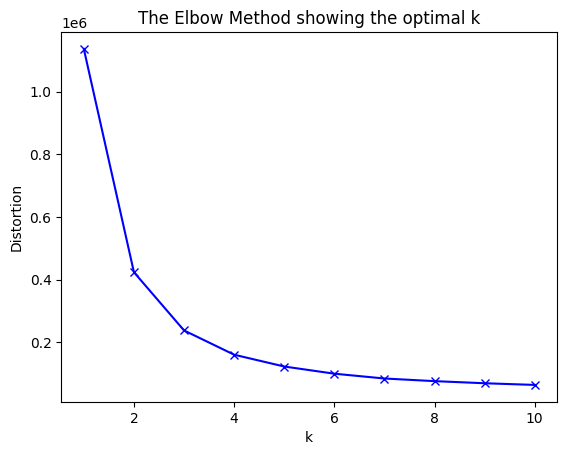

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your data
distortions = []
K = range(1, 11)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [27]:
initial_rsi_values=[30,45,55,70]

initial_centroids=np.zeros((len(initial_rsi_values),data.shape[1]))
initial_centroids[:,6]=initial_rsi_values
initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [28]:
data

atr   bb_high    bb_low    bb_mid  \
date       ticker                                           
2018-02-28 AAL     1.368837  4.015218  3.875603  3.945411   
           AAPL   -0.792852  3.795134  3.617069  3.706102   
           ABBV    1.936506  4.539666  4.420361  4.480013   
           ABT    -0.604301  4.051457  3.947487  3.999472   
           ACN    -0.514960  5.030859  4.932437  4.981648   
...                     ...       ...       ...       ...   
2024-02-29 VRTX    1.271697  6.102493  6.035105  6.068799   
           VZ      0.039358  3.801870  3.646189  3.724029   
           WFC    -0.095808  3.957063  3.853271  3.905167   
           WMT     0.160282  5.134510  5.060651  5.097581   
           XOM     0.360221  4.665701  4.567458  4.616580   

                   garman_klass_volatility      macd        rsi  return_1M  \
date       ticker                                                            
2018-02-28 AAL                   -0.000118  0.431611  55.685264   0.000632   
           AAPL                  -0.001207 -0.023588  59.836089   0.068185   
           ABBV                  -0.034391  1.158850  56.507200   0.032169   
           ABT                   -0.004361 -0.047956  55.823950  -0.029440   
           ACN                   -0.003895  0.104424  54.875627   0.001929   
...                                    ...       ...        ...        ...   
2024-02-29 VRTX                   0.000073  1.808073  55.479647  -0.020075   
           VZ                     0.000114  2.609832  66.047980  -0.005195   
           WFC                    0.000408  0.651313  56.285441  -0.013446   
           WMT                    0.000096  1.518877  68.719276   0.026142   
           XOM                    0.000155  0.269902  51.749501  -0.008170   

                   return_2M  return_3M  return_6M  return_9M  return_12M  \
date       ticker                                                           
2018-02-28 AAL      0.022092   0.024888   0.033351   0.013426    0.013883   
           AAPL     0.028019   0.013390   0.015155   0.018521    0.023458   
           ABBV     0.098315   0.063744   0.076940   0.065844    0.050362   
           ABT      0.030620   0.024517   0.030254   0.033180    0.026397   
           ACN      0.025541   0.028460   0.036957   0.030116    0.024744   
...                      ...        ...        ...        ...         ...   
2024-02-29 VRTX     0.021627   0.061749   0.033578   0.030674    0.032213   
           VZ       0.065998   0.037779   0.038009   0.025105    0.012923   
           WFC      0.002894   0.035471   0.032231   0.026413    0.006798   
           WMT      0.037116   0.030148   0.007632   0.016916    0.016100   
           XOM      0.009903  -0.002504  -0.012827   0.001691   -0.004081   

                     Mkt-RF       SMB       HML       RMW       CMA  
date       ticker                                                    
2018-02-28 AAL     0.012482  0.013817  0.005252  0.002482  0.007244  
           AAPL    0.013196 -0.003488 -0.006152  0.005184  0.005886  
           ABBV    0.004624  0.005161 -0.001222  0.004442  0.003123  
           ABT     0.008138 -0.001481 -0.005114  0.002963  0.009899  
           ACN     0.012199 -0.001644 -0.003048  0.003115  0.001784  
...                     ...       ...       ...       ...       ...  
2024-02-29 VRTX    0.005202 -0.000053 -0.008938  0.001369  0.008591  
           VZ      0.004827 -0.003685  0.001116  0.002849  0.004245  
           WFC     0.010695 -0.000777  0.014740 -0.007237 -0.006672  
           WMT     0.006029 -0.004297 -0.003220  0.003128  0.006877  
           XOM     0.011236  0.002584  0.007155 -0.004816  0.006049  

[10398 rows x 18 columns]

In [29]:
def get_clusters(dfx):
  dfx['cluster']=KMeans(
                    n_clusters=4,
                    random_state=0,
                    init=initial_centroids
                    ).fit(dfx).labels_
  return dfx

data=data.groupby('date',group_keys=False).apply(get_clusters)
data

atr   bb_high    bb_low    bb_mid  \
date       ticker                                           
2018-02-28 AAL     1.368837  4.015218  3.875603  3.945411   
           AAPL   -0.792852  3.795134  3.617069  3.706102   
           ABBV    1.936506  4.539666  4.420361  4.480013   
           ABT    -0.604301  4.051457  3.947487  3.999472   
           ACN    -0.514960  5.030859  4.932437  4.981648   
...                     ...       ...       ...       ...   
2024-02-29 VRTX    1.271697  6.102493  6.035105  6.068799   
           VZ      0.039358  3.801870  3.646189  3.724029   
           WFC    -0.095808  3.957063  3.853271  3.905167   
           WMT     0.160282  5.134510  5.060651  5.097581   
           XOM     0.360221  4.665701  4.567458  4.616580   

                   garman_klass_volatility      macd        rsi  return_1M  \
date       ticker                                                            
2018-02-28 AAL                   -0.000118  0.431611  55.685264   0.000632   
           AAPL                  -0.001207 -0.023588  59.836089   0.068185   
           ABBV                  -0.034391  1.158850  56.507200   0.032169   
           ABT                   -0.004361 -0.047956  55.823950  -0.029440   
           ACN                   -0.003895  0.104424  54.875627   0.001929   
...                                    ...       ...        ...        ...   
2024-02-29 VRTX                   0.000073  1.808073  55.479647  -0.020075   
           VZ                     0.000114  2.609832  66.047980  -0.005195   
           WFC                    0.000408  0.651313  56.285441  -0.013446   
           WMT                    0.000096  1.518877  68.719276   0.026142   
           XOM                    0.000155  0.269902  51.749501  -0.008170   

                   return_2M  return_3M  return_6M  return_9M  return_12M  \
date       ticker                                                           
2018-02-28 AAL      0.022092   0.024888   0.033351   0.013426    0.013883   
           AAPL     0.028019   0.013390   0.015155   0.018521    0.023458   
           ABBV     0.098315   0.063744   0.076940   0.065844    0.050362   
           ABT      0.030620   0.024517   0.030254   0.033180    0.026397   
           ACN      0.025541   0.028460   0.036957   0.030116    0.024744   
...                      ...        ...        ...        ...         ...   
2024-02-29 VRTX     0.021627   0.061749   0.033578   0.030674    0.032213   
           VZ       0.065998   0.037779   0.038009   0.025105    0.012923   
           WFC      0.002894   0.035471   0.032231   0.026413    0.006798   
           WMT      0.037116   0.030148   0.007632   0.016916    0.016100   
           XOM      0.009903  -0.002504  -0.012827   0.001691   -0.004081   

                     Mkt-RF       SMB       HML       RMW       CMA  cluster  
date       ticker                                                             
2018-02-28 AAL     0.012482  0.013817  0.005252  0.002482  0.007244        2  
           AAPL    0.013196 -0.003488 -0.006152  0.005184  0.005886        3  
           ABBV    0.004624  0.005161 -0.001222  0.004442  0.003123        2  
           ABT     0.008138 -0.001481 -0.005114  0.002963  0.009899        2  
           ACN     0.012199 -0.001644 -0.003048  0.003115  0.001784        2  
...                     ...       ...       ...       ...       ...      ...  
2024-02-29 VRTX    0.005202 -0.000053 -0.008938  0.001369  0.008591        2  
           VZ      0.004827 -0.003685  0.001116  0.002849  0.004245        3  
           WFC     0.010695 -0.000777  0.014740 -0.007237 -0.006672        2  
           WMT     0.006029 -0.004297 -0.003220  0.003128  0.006877        3  
           XOM     0.011236  0.002584  0.007155 -0.004816  0.006049        2  

[10398 rows x 19 columns]

In [30]:
def plot_cluster(data):
  c0=data[data['cluster']==0]
  c1=data[data['cluster']==1]
  c2=data[data['cluster']==2]
  c3=data[data['cluster']==3]

  plt.scatter(c0.iloc[:,0],c0.iloc[:,6],color='red',label='cluster0')
  plt.scatter(c1.iloc[:,0],c1.iloc[:,6],color='green',label='cluster1')
  plt.scatter(c2.iloc[:,0],c2.iloc[:,6],color='blue',label='cluster2')
  plt.scatter(c3.iloc[:,0],c3.iloc[:,6],color='black',label='cluster3')

  plt.legend()
  plt.show()
  return


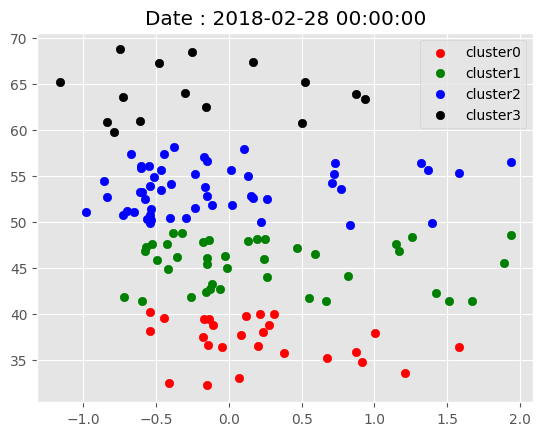

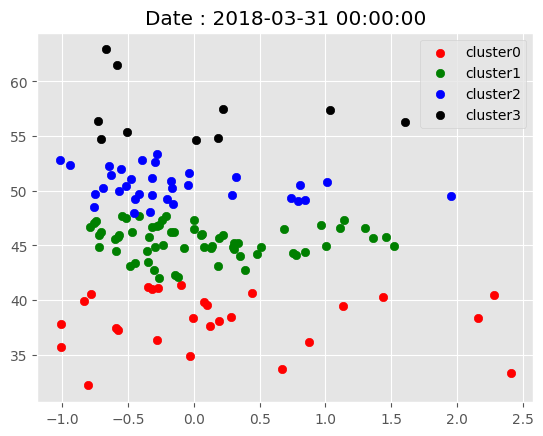

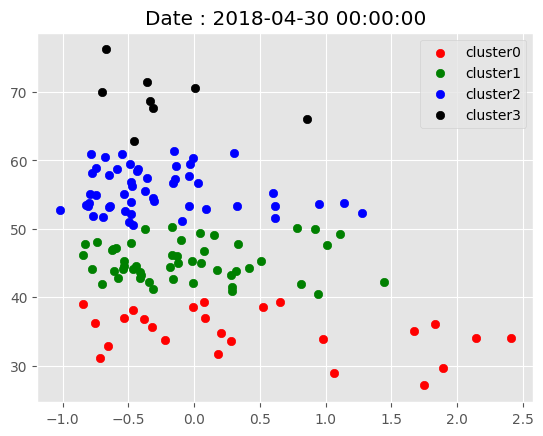

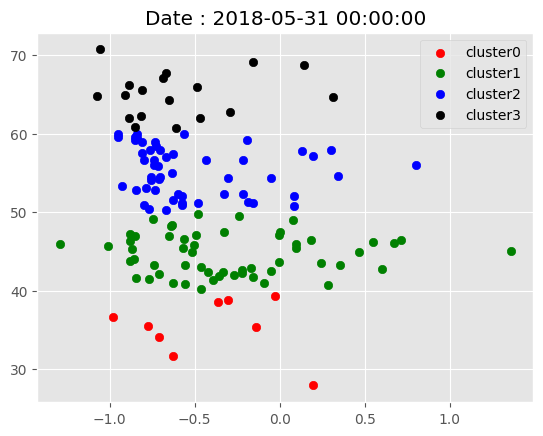

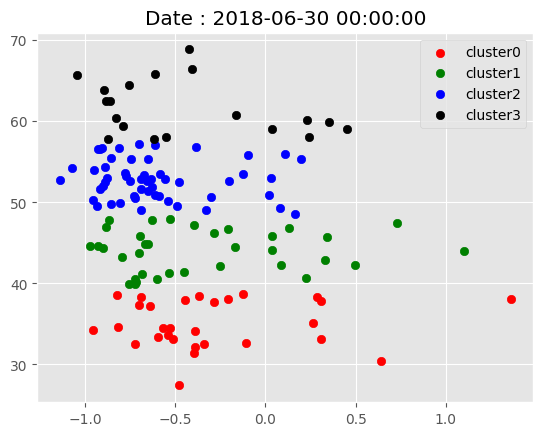

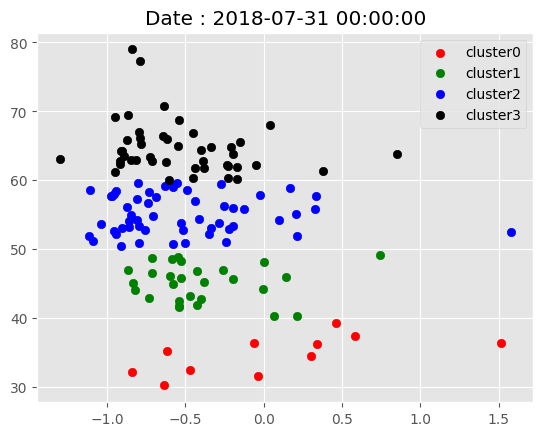

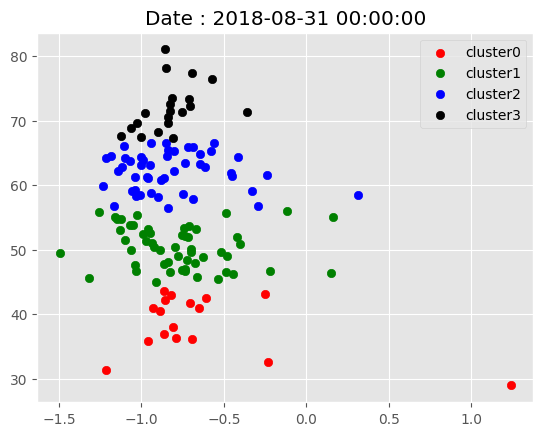

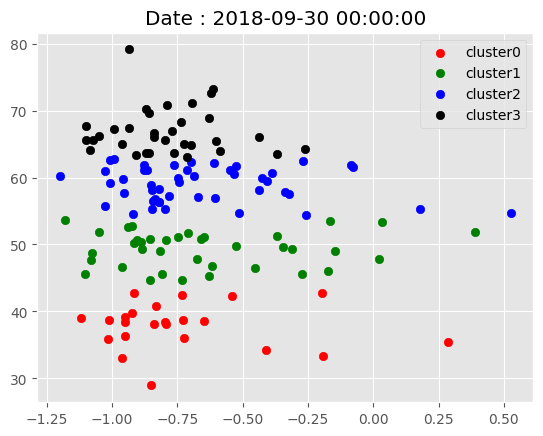

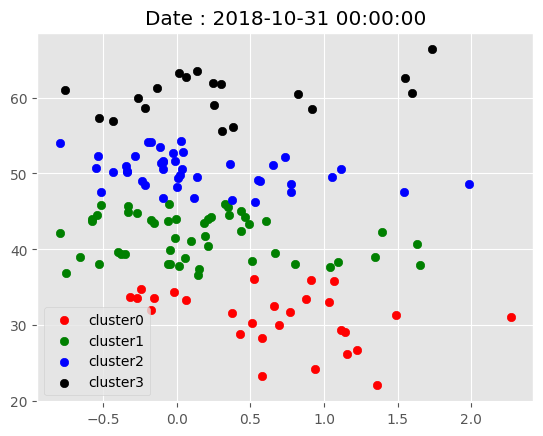

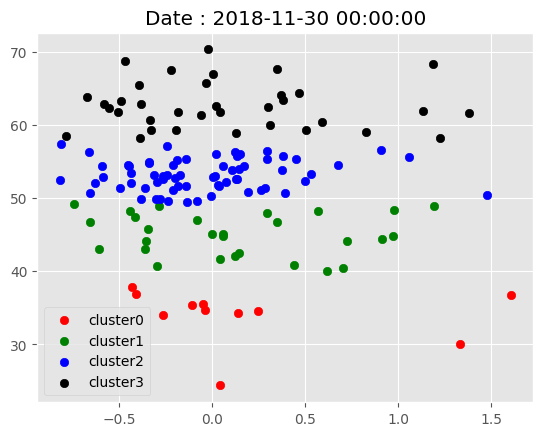

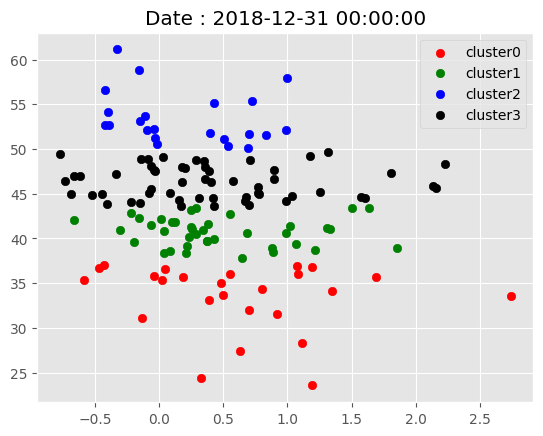

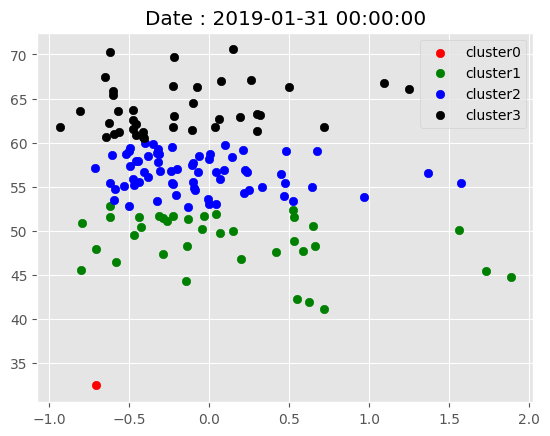

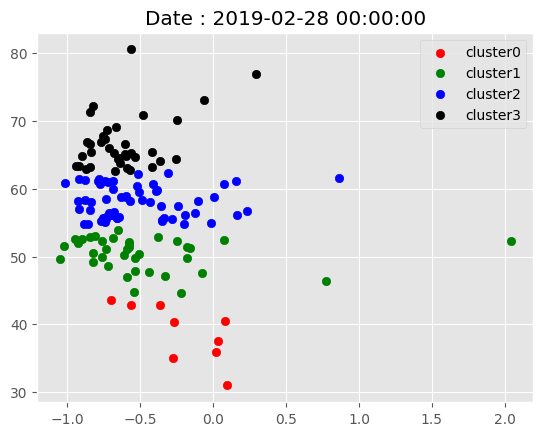

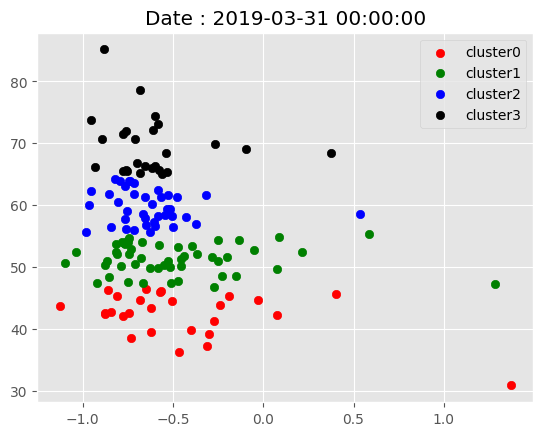

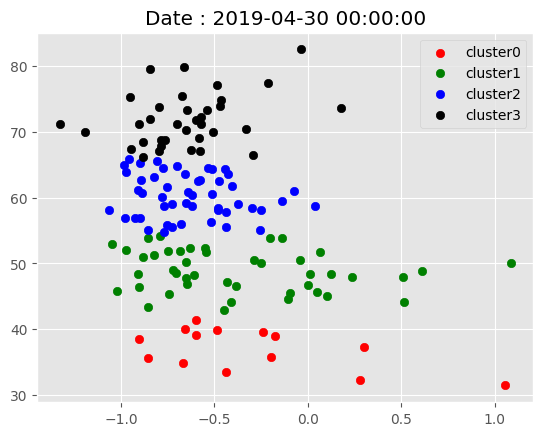

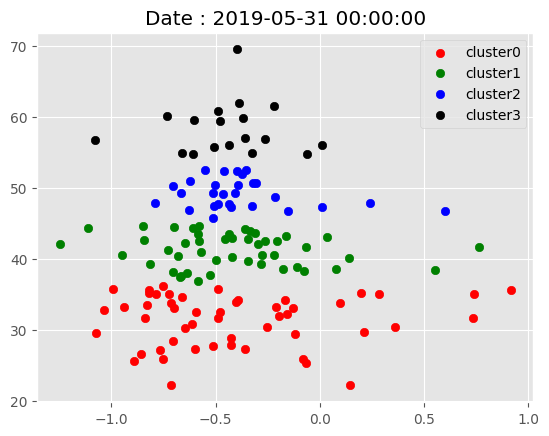

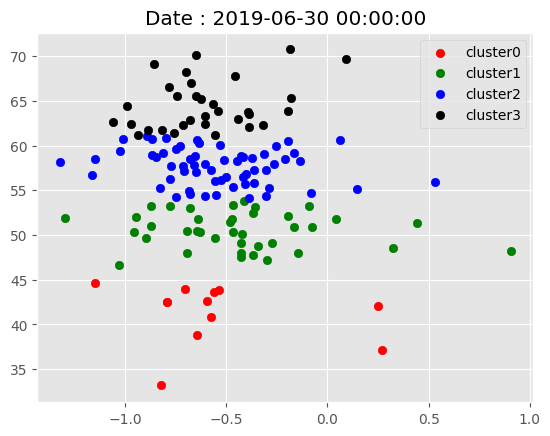

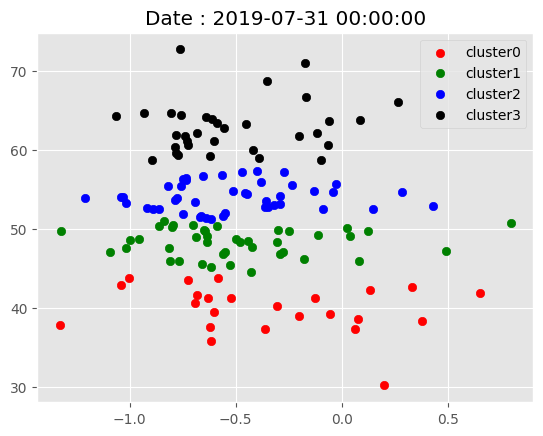

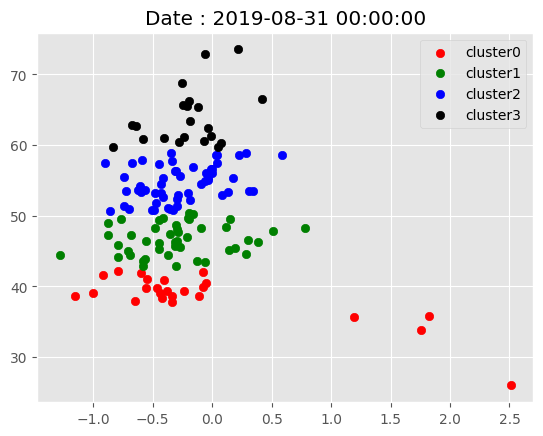

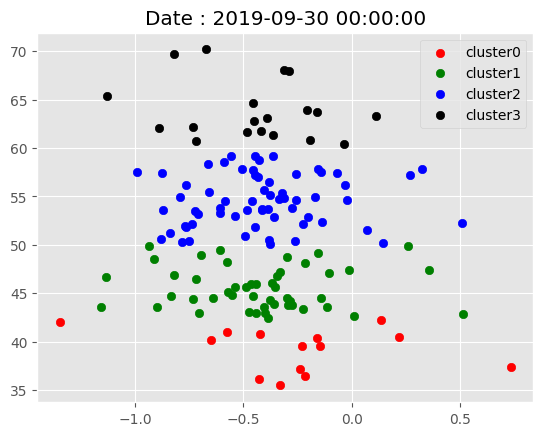

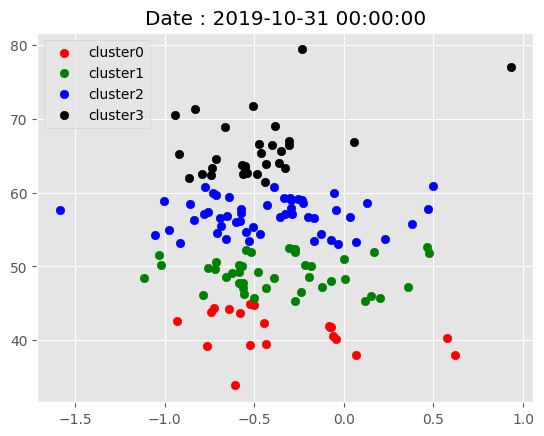

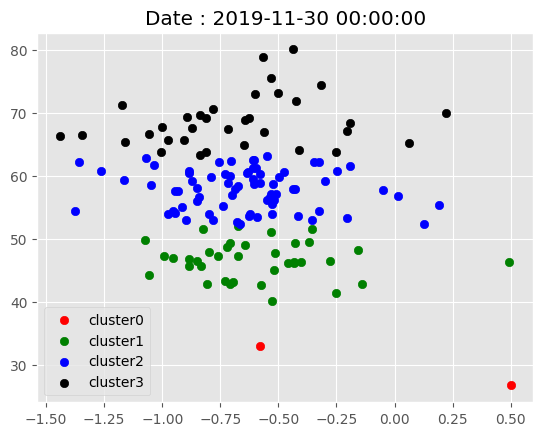

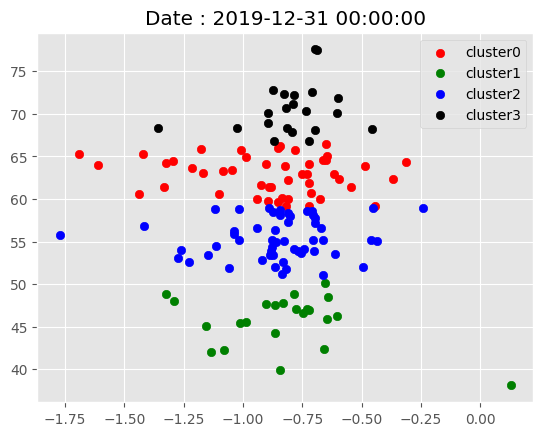

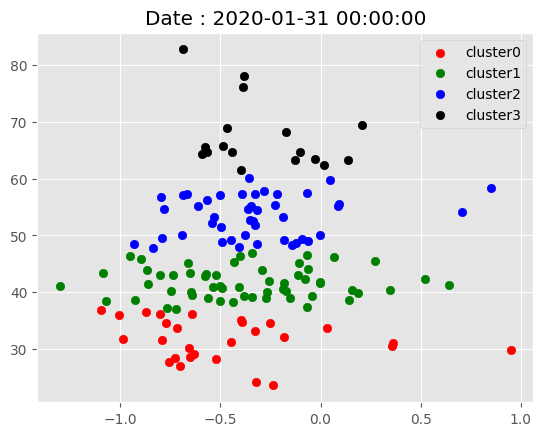

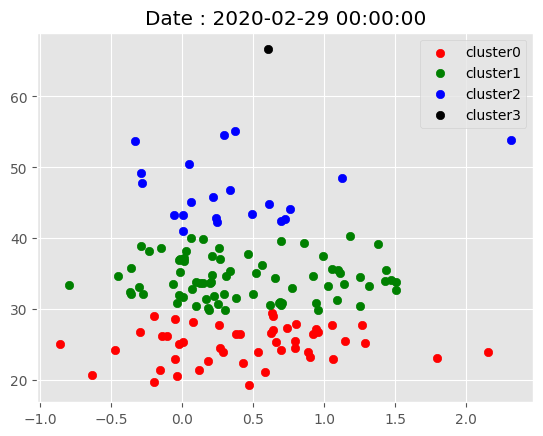

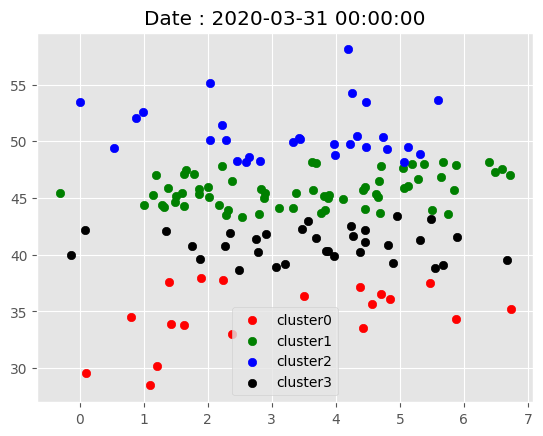

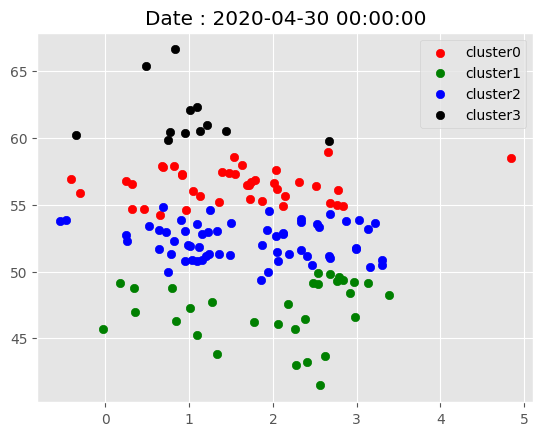

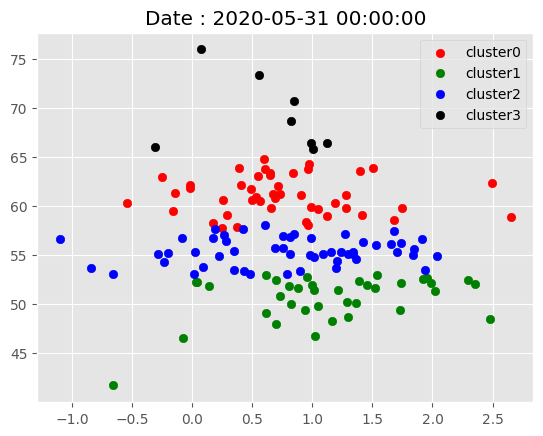

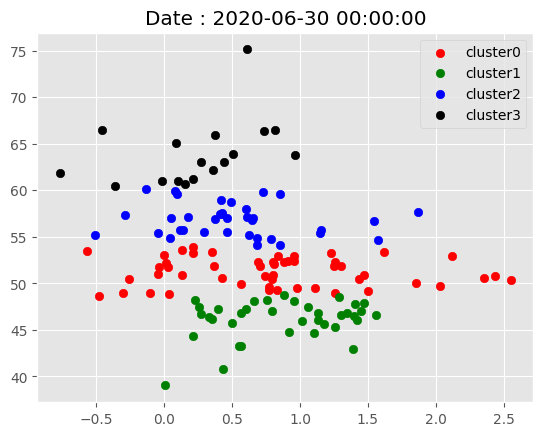

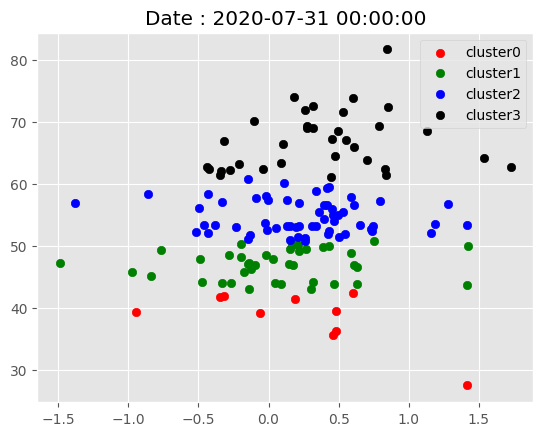

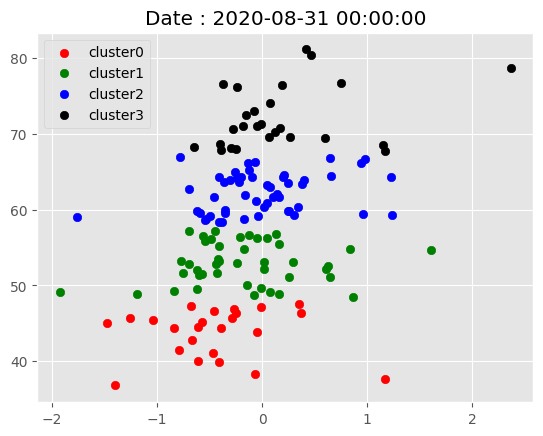

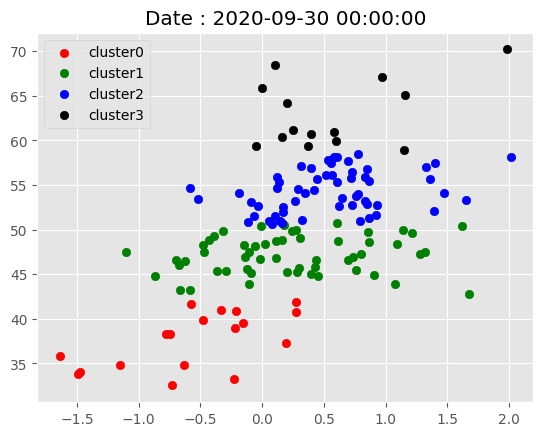

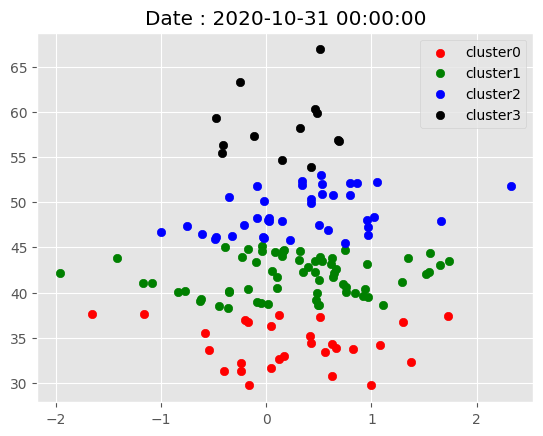

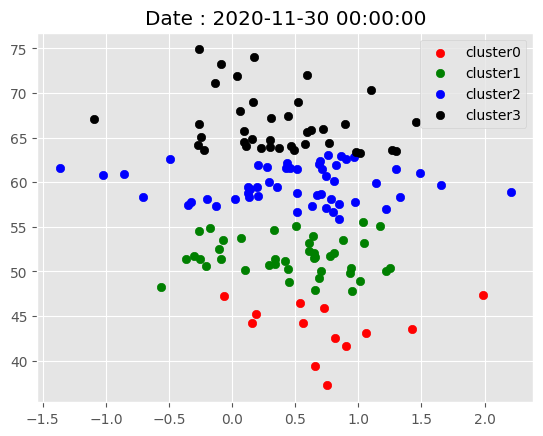

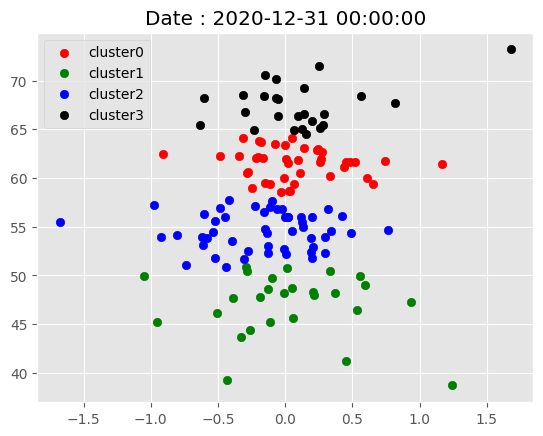

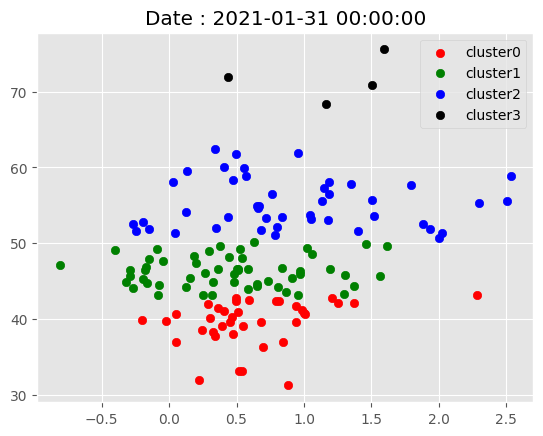

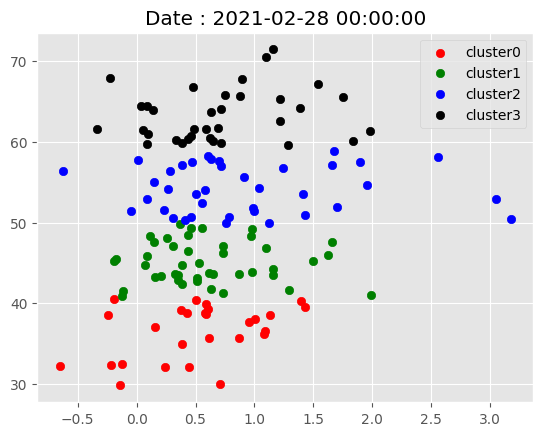

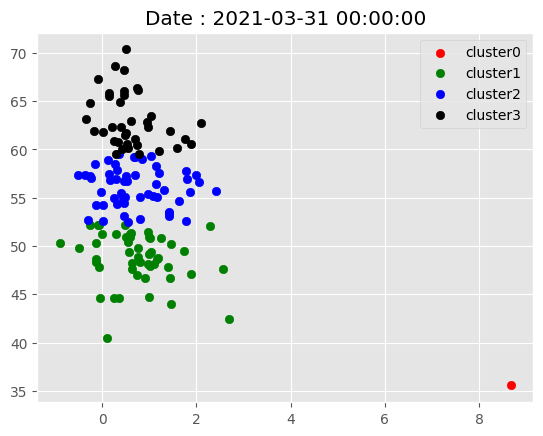

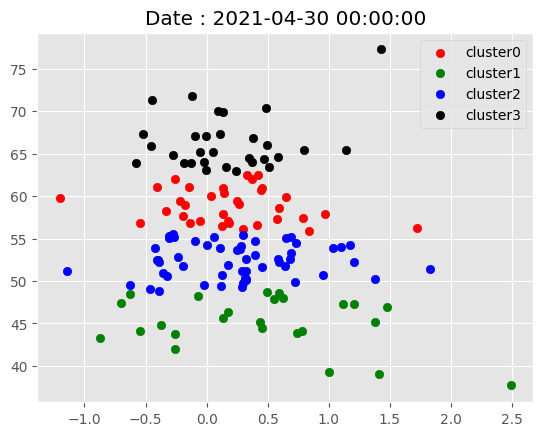

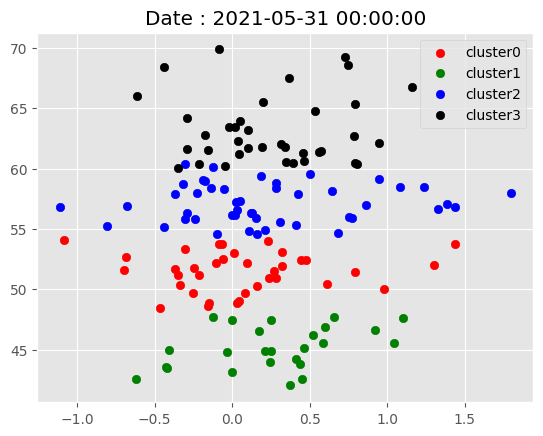

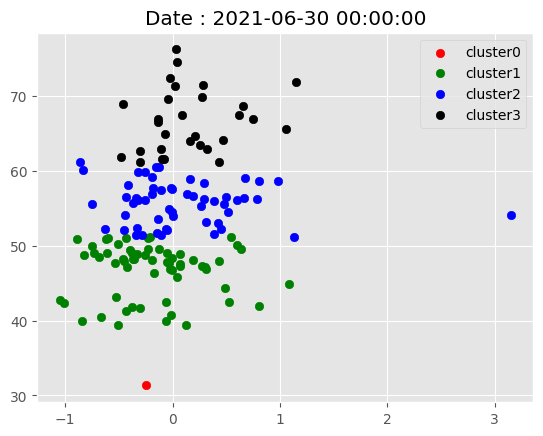

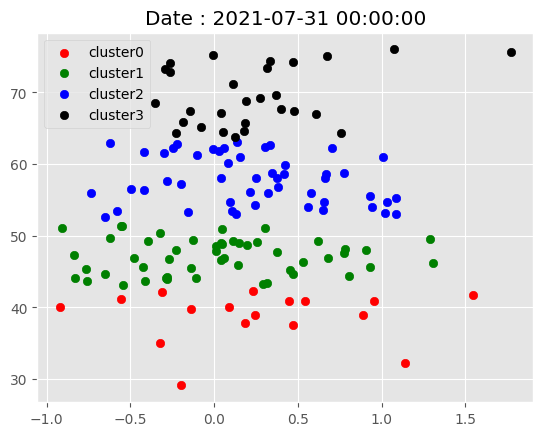

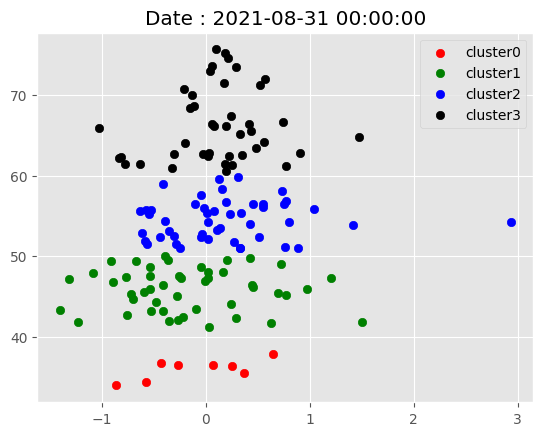

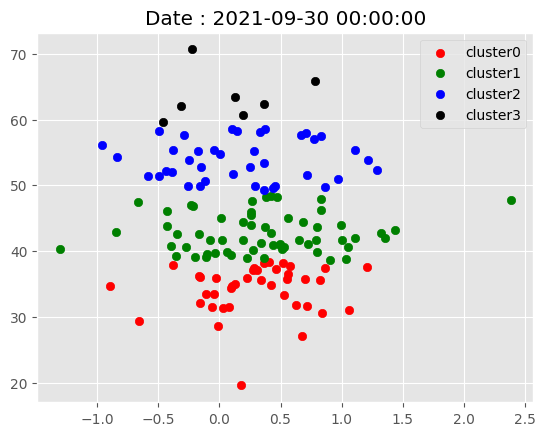

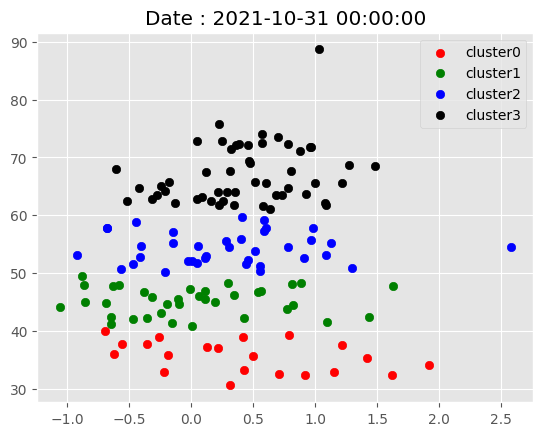

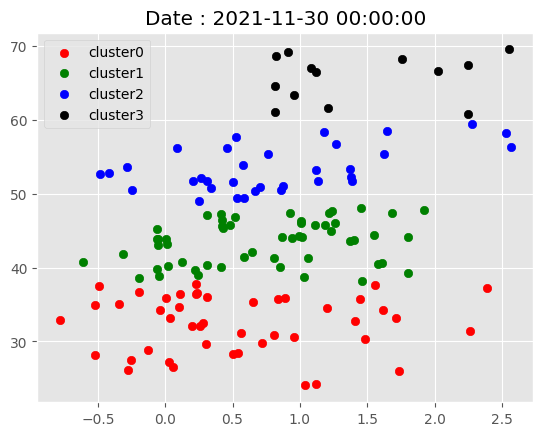

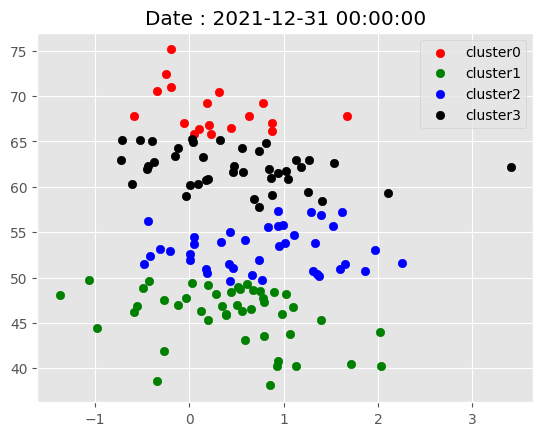

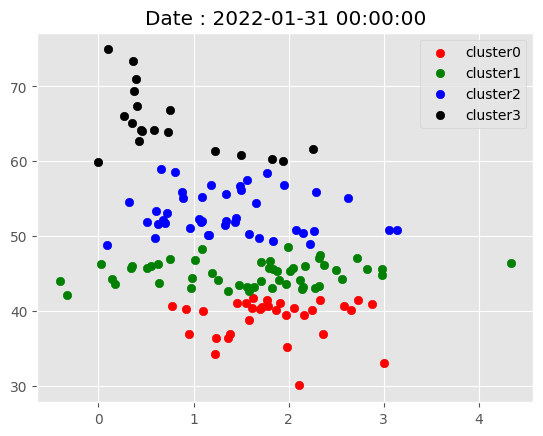

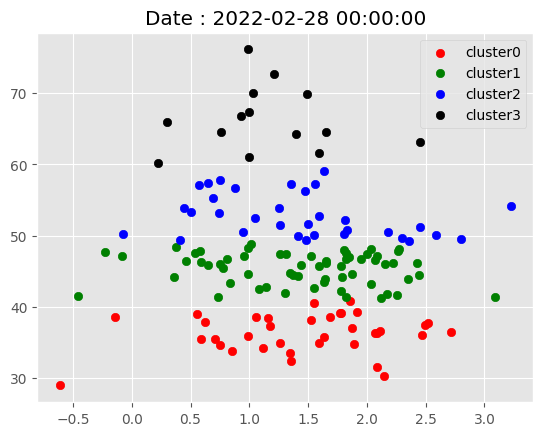

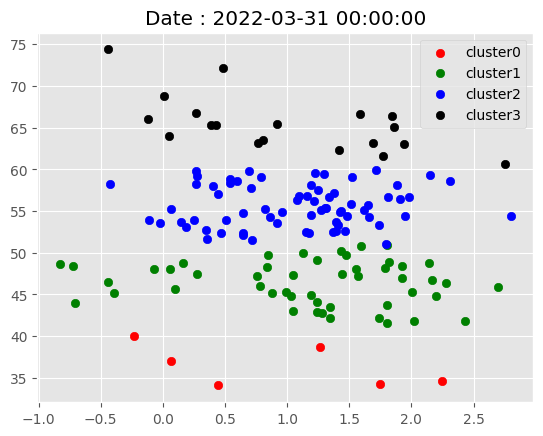

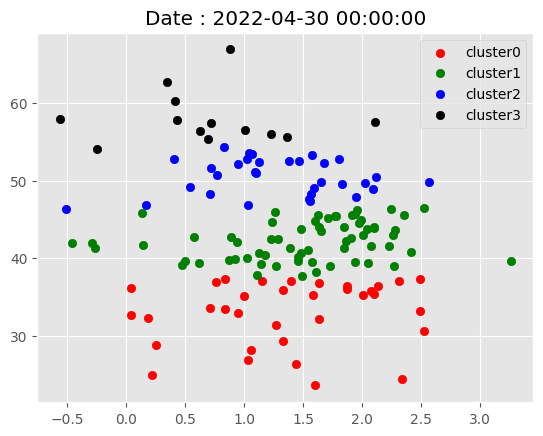

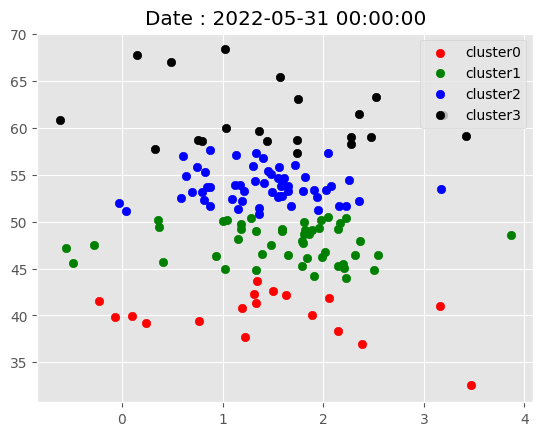

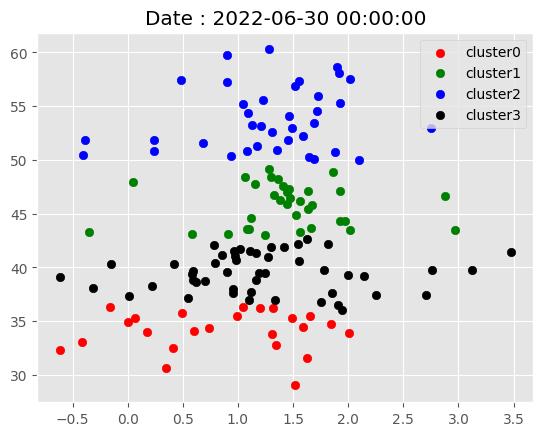

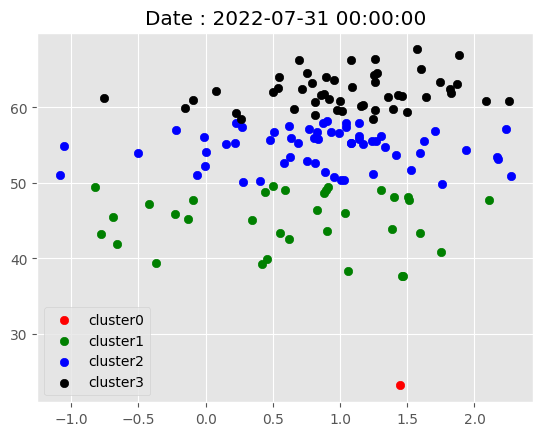

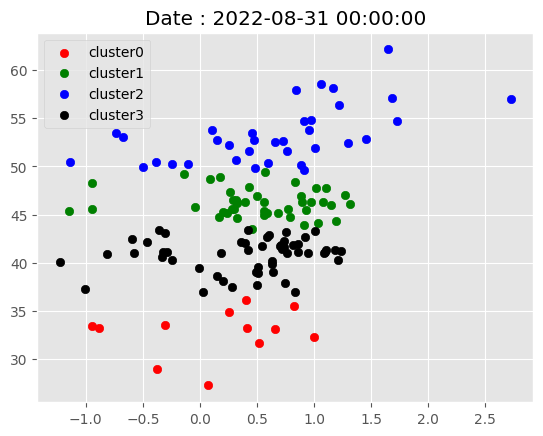

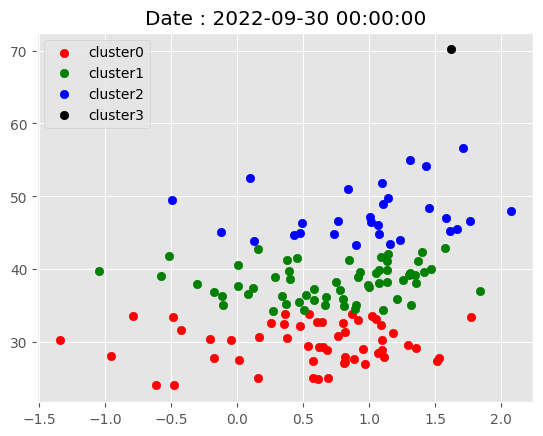

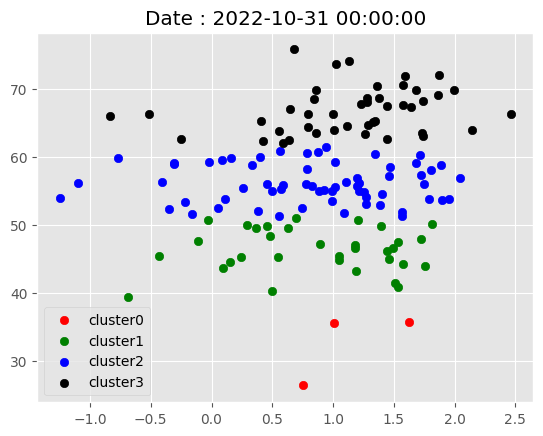

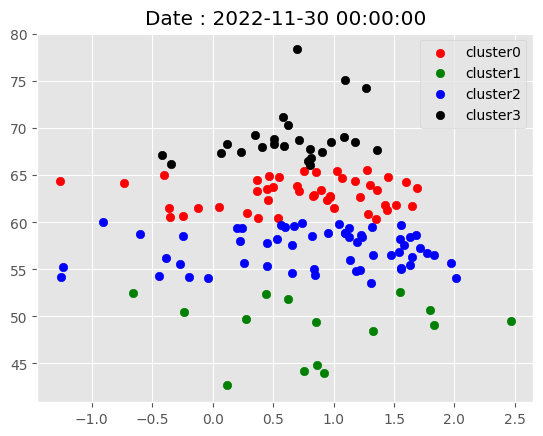

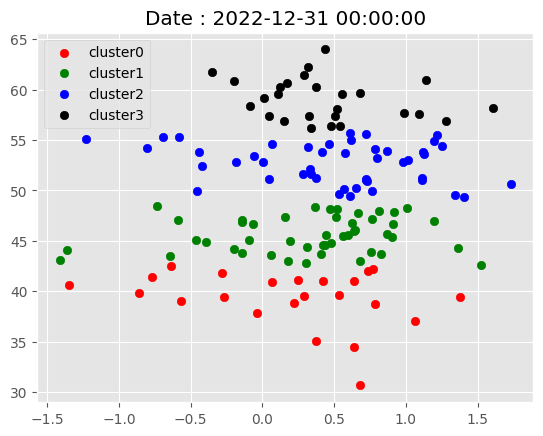

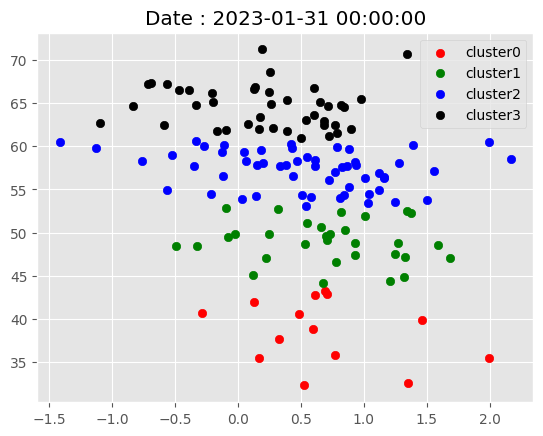

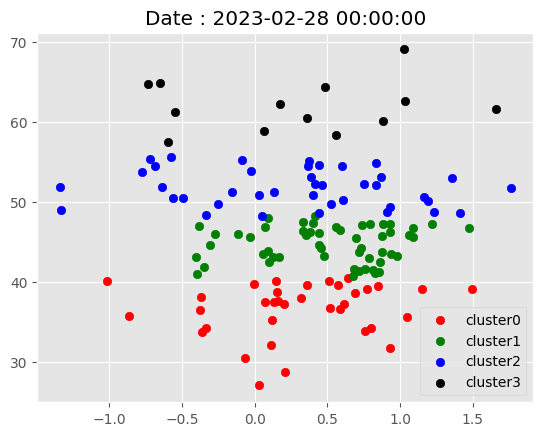

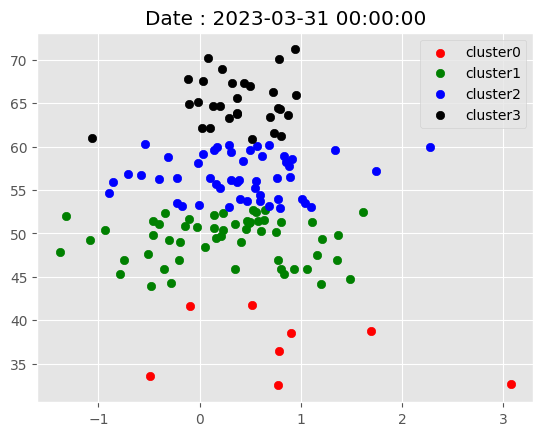

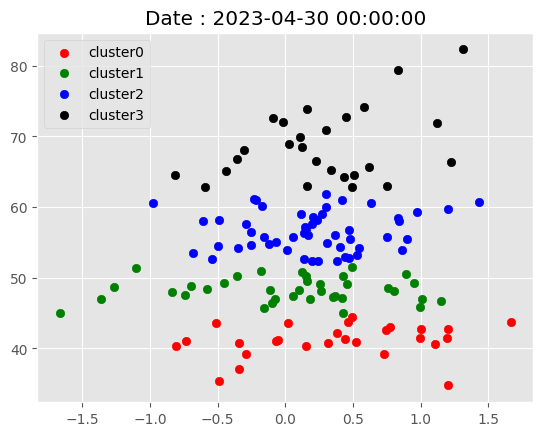

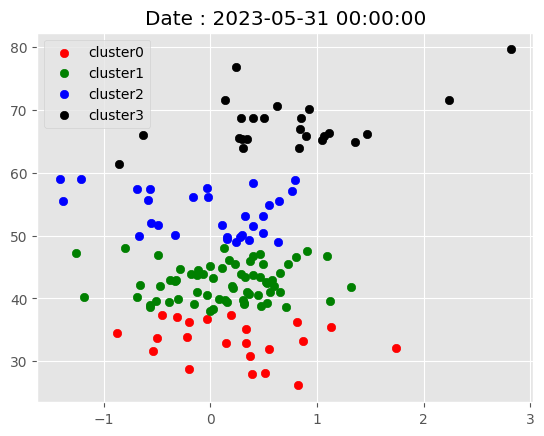

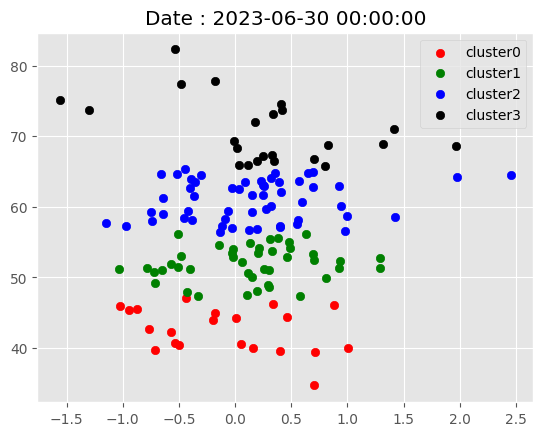

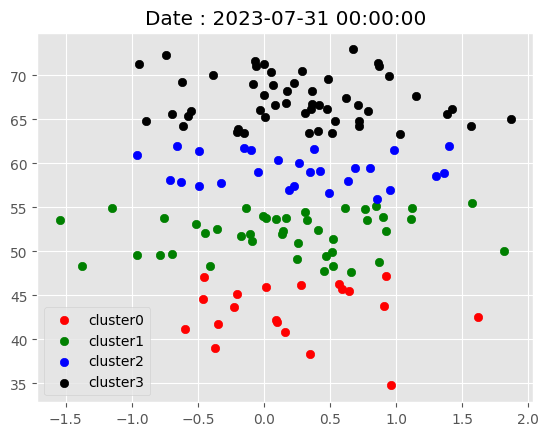

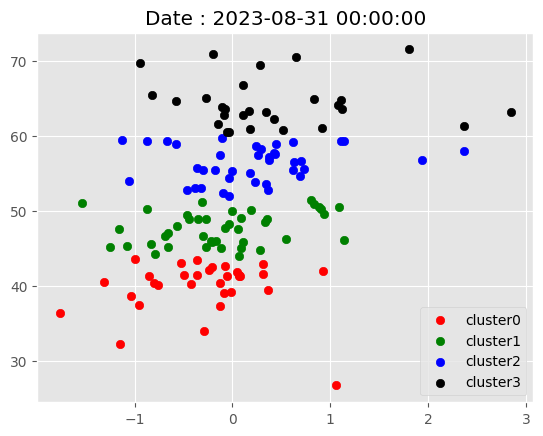

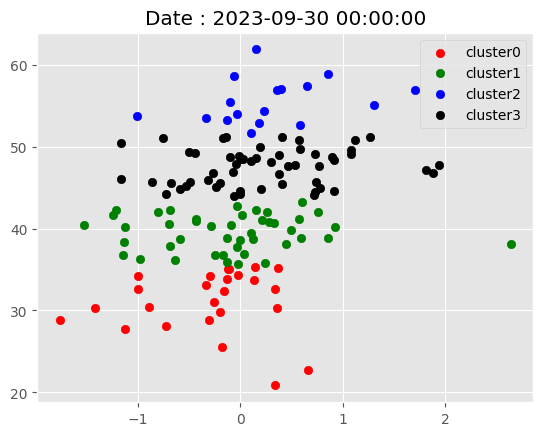

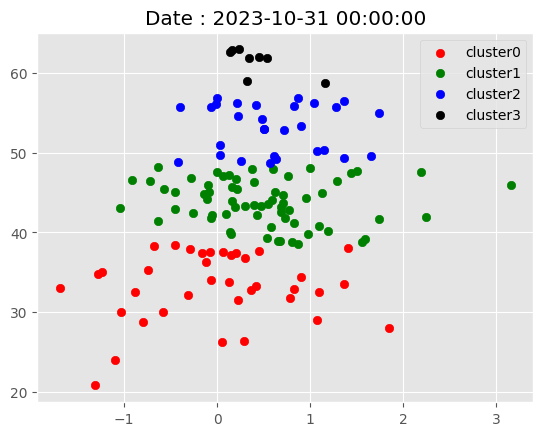

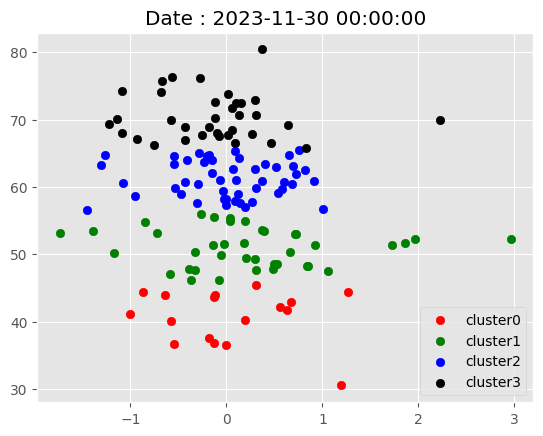

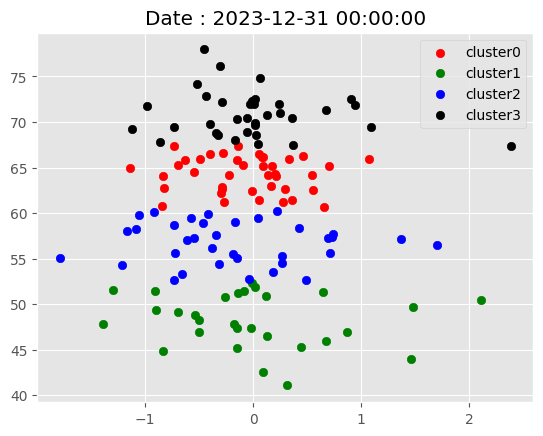

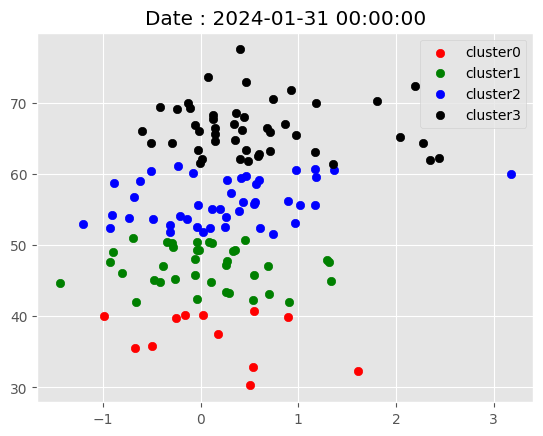

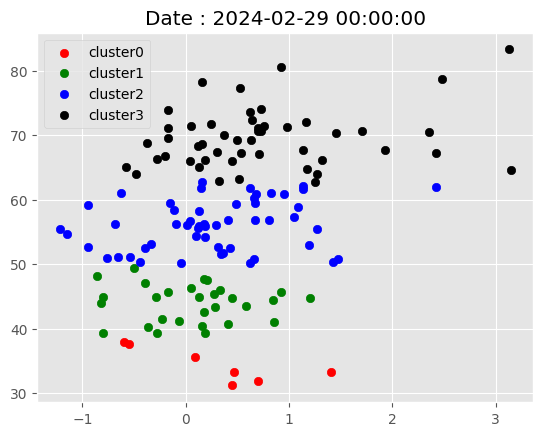

In [31]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
  g=data.xs(i,level=0)
  plt.title(f'Date : {i}')
  plot_cluster(g)


## For each month select assets based on the cluster from the portfolio based on the effecient Frontier max sharp ratio optimizaion.
* Stocks that lie in the cluster 3 would have the highest momentum throughout the month and hence we will choose those stocks only asd filter them.

In [71]:
filtered_df=data[data['cluster']==1].copy()
filtered_df= filtered_df.drop('cluster',axis=1)
filtered_df=filtered_df.reset_index(level=1)
filtered_df.index=filtered_df.index + pd.DateOffset(1)
filtered_df=filtered_df.reset_index().set_index(['date','ticker'])
filtered_df

atr   bb_high    bb_low    bb_mid  \
date       ticker                                           
2018-03-01 AMT    -0.385505  4.863683  4.758256  4.810969   
           AVGO   -0.579258  5.353046  5.229050  5.291048   
           C       0.245907  4.180553  4.092869  4.136711   
           CAT     0.467494  4.975815  4.857421  4.916618   
           CHTR   -0.157998  5.949979  5.836484  5.893231   
...                     ...       ...       ...       ...   
2024-03-01 SCHW    0.054186  4.224883  4.135012  4.179947   
           SLB     0.283867  3.993362  3.868803  3.931083   
           TXN     0.444551  5.161950  5.063640  5.112795   
           UNH     1.201402  6.303220  6.198101  6.250660   
           USB     0.204423  3.816208  3.717643  3.766925   

                   garman_klass_volatility      macd        rsi  return_1M  \
date       ticker                                                            
2018-03-01 AMT                   -0.008709 -0.177347  48.783475  -0.056669   
           AVGO                  -0.022052 -0.413772  46.804812  -0.006330   
           C                     -0.019175 -0.013770  48.121679  -0.034196   
           CAT                   -0.012231 -0.257762  47.154684  -0.050067   
           CHTR                   0.000144 -0.313211  42.309598  -0.093625   
...                                    ...       ...        ...        ...   
2024-03-01 SCHW                   0.000319 -0.549690  46.358154   0.000318   
           SLB                    0.000098 -0.341320  43.297483   0.006160   
           TXN                    0.000071 -0.560958  44.688922  -0.005746   
           UNH                    0.000103 -1.918381  44.743147  -0.002951   
           USB                    0.000301 -0.030986  47.483438  -0.016851   

                   return_2M  return_3M  return_6M  return_9M  return_12M  \
date       ticker                                                           
2018-03-01 AMT     -0.011774  -0.009125  -0.008433   0.008369    0.017963   
           AVGO    -0.020530  -0.037158  -0.001968   0.004864    0.014702   
           C        0.009272   0.001306   0.018908   0.026302    0.020920   
           CAT     -0.007108   0.032463   0.048692   0.045535    0.042189   
           CHTR     0.008846   0.015812  -0.025210  -0.001169    0.004742   
...                      ...        ...        ...        ...         ...   
2024-03-01 SCHW    -0.043535   0.008730   0.011174   0.020899   -0.016515   
           SLB     -0.029648  -0.018289  -0.028916   0.016692   -0.005652   
           TXN     -0.029787   0.016630  -0.006177  -0.007110   -0.003533   
           UNH     -0.015544  -0.025352   0.012666   0.006408    0.007068   
           USB     -0.028597   0.027072   0.023200   0.039984   -0.008423   

                     Mkt-RF       SMB       HML       RMW       CMA  
date       ticker                                                    
2018-03-01 AMT     0.005686 -0.001064 -0.004403  0.004603  0.004936  
           AVGO    0.010338  0.003279 -0.004105  0.004606  0.002294  
           C       0.013961  0.002044  0.012641 -0.003366 -0.004437  
           CAT     0.009404  0.003864  0.003909 -0.000421  0.001785  
           CHTR    0.010596 -0.000977  0.001616  0.002866 -0.003889  
...                     ...       ...       ...       ...       ...  
2024-03-01 SCHW    0.009598 -0.002097  0.014505 -0.013139 -0.011579  
           SLB     0.017951  0.003908  0.013369 -0.011819  0.005317  
           TXN     0.007901  0.002782  0.001809  0.004377 -0.000658  
           UNH     0.007468  0.000529 -0.002792  0.000156  0.006035  
           USB     0.008037  0.001511  0.014293 -0.004373 -0.008903  

[3254 rows x 18 columns]

In [72]:
dates=filtered_df.index.get_level_values(level=0).unique().tolist()
fixed_dates={}
for date in dates:
  fixed_dates[date.strftime('%Y-%m-%d')]=filtered_df.xs(date).index.tolist()
fixed_dates

{'2018-03-01': ['AMT',
  'AVGO',
  'C',
  'CAT',
  'CHTR',
  'COP',
  'CSX',
  'DD',
  'DE',
  'DG',
  'DIS',
  'DLTR',
  'FDX',
  'GILD',
  'HAL',
  'HD',
  'HON',
  'JNJ',
  'KR',
  'LLY',
  'LUV',
  'MCK',
  'MDT',
  'META',
  'MMM',
  'ORLY',
  'PM',
  'PXD',
  'SHW',
  'SLB',
  'STZ',
  'T',
  'TMUS',
  'ULTA',
  'UNH',
  'UNP',
  'USB',
  'VLO',
  'WBA',
  'WFC'],
 '2018-04-01': ['AAL',
  'AAPL',
  'ABT',
  'ACN',
  'AMAT',
  'AMZN',
  'AVGO',
  'AXP',
  'BA',
  'BAC',
  'BMY',
  'BRK-B',
  'CAT',
  'CVX',
  'DE',
  'DIS',
  'DLTR',
  'EA',
  'EBAY',
  'FCX',
  'FDX',
  'GILD',
  'GOOG',
  'GOOGL',
  'GS',
  'HD',
  'IBM',
  'ISRG',
  'JNJ',
  'JPM',
  'KO',
  'LLY',
  'LOW',
  'LUV',
  'MAR',
  'MCD',
  'MDLZ',
  'MET',
  'MO',
  'MRK',
  'MS',
  'NVDA',
  'OXY',
  'PEP',
  'PFE',
  'PG',
  'PM',
  'PNC',
  'PYPL',
  'RTX',
  'SCHW',
  'SHW',
  'SLB',
  'T',
  'TGT',
  'TMO',
  'TMUS',
  'TXN',
  'ULTA',
  'UPS',
  'VZ',
  'WMT',
  'XOM'],
 '2018-05-01': ['AAPL',
  'ABBV',
  'AB

In [73]:
!pip install PyPortfolioOpt

In [74]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):

    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)

    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)

    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')

    weights = ef.max_sharpe()

    return ef.clean_weights()

In [75]:
dates[-1]-pd.DateOffset(months=12)

Timestamp('2023-03-01 00:00:00')

In [76]:
stocks=data.index.get_level_values(level=1).unique().tolist()
new_df=yf.download(tickers=stocks,
                   start=dates[0]-pd.DateOffset(months=12),
                   end=dates[-1])
new_df

[*********************100%%**********************]  158 of 158 completed


Price       Adj Close                                                  \
Ticker            AAL        AAPL        ABBV         ABT         ACN   
Date                                                                    
2017-03-01  45.605850   32.664845   46.216694   40.299221  110.974197   
2017-03-02  44.279026   32.470905   46.525642   40.387611  111.224625   
2017-03-03  45.344349   32.662502   46.591839   39.998680  110.589561   
2017-03-06  43.881947   32.559696   46.746319   39.892609  110.231789   
2017-03-07  43.426758   32.601757   46.849285   39.777687  111.036797   
...               ...         ...         ...         ...         ...   
2024-01-31  14.230000  184.399994  164.399994  113.150002  363.880005   
2024-02-01  14.340000  186.860001  167.589996  114.489998  370.910004   
2024-02-02  14.560000  185.850006  168.669998  112.110001  372.950012   
2024-02-05  14.260000  187.679993  171.259995  111.650002  370.339996   
2024-02-06  14.815000  188.779999  172.210007  113.300003  366.540009   

Price                                                                  ...  \
Ticker            ADBE         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2017-03-01  120.349998   90.208626   88.930000  53.665951   34.039112  ...   
2017-03-02  119.900002   89.811668   87.320000  53.059788   33.706570  ...   
2017-03-03  120.040001   90.182747   85.320000  53.325493   34.057587  ...   
2017-03-06  120.150002   90.571114   82.940002  52.960148   34.048351  ...   
2017-03-07  119.980003   89.984283   82.070000  52.686123   34.149967  ...   
...                ...         ...         ...        ...         ...  ...   
2024-01-31  617.780029  245.779999  253.809998  69.510002  164.300003  ...   
2024-02-01  627.909973  247.080002  255.070007  68.820000  166.970001  ...   
2024-02-02  634.760010  248.809998  256.450012  69.629997  168.179993  ...   
2024-02-05  630.500000  248.279999  252.809998  68.930000  171.089996  ...   
2024-02-06  607.210022  250.860001  252.794998  69.154999  167.710007  ...   

Price         Volume                                                           \
Ticker             V      VLO     VRTX        VZ       WBA      WDC       WFC   
Date                                                                            
2017-03-01  11131400  4921900  2089400  16095600   3390500  4667800  25912700   
2017-03-02  10544200  7343000  1060900  10773400   3096800  4867100  17578600   
2017-03-03   5700600  4046600  1422600  11071600   3157600  3223100  14740000   
2017-03-06   7347600  3315300  1587700  10827300   2437500  3855000  13225500   
2017-03-07   5688400  5504100  1960700  12896900   2408000  2123200  13099900   
...              ...      ...      ...       ...       ...      ...       ...   
2024-01-31   6139300  4273500  2755200  23392300  60298100  5798000  20394400   
2024-02-01   7065000  4695200  1484600  19586500  14326600  7272800  27566100   
2024-02-02   4848700  3639600  2181300  21546500  11315000  5529400  19329000   
2024-02-05   4898800  3462400  1918200  20463700  12100200  4833400  14199200   
2024-02-06   1369215  1470176  2482768   5306376   4141186  2250614   6124251   

Price                                    
Ticker           WMT     WYNN       XOM  
Date                                     
2017-03-01  13522700  6088500  17482100  
2017-03-02   8916300  2754100  14170300  
2017-03-03   9297900  1782100  12190400  
2017-03-06   9182600  1206000   9617200  
2017-03-07   7282900  2462400  12711500  
...              ...      ...       ...  
2024-01-31   8711600  1583000  22415300  
2024-02-01   6930900  1942200  19240700  
2024-02-02   7218900  1225200  21968200  
2024-02-05   6379000  1546900  17184300  
2024-02-06   1814626   906097   5748239  

[1746 rows x 948 columns]

In [77]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():

    try:
        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        cols = fixed_dates[start_date]
        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]

        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')

        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T

        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)


    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2020-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-07-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-12-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"


,Strategy Return
date,
2018-03-01,-0.011479
2018-03-02,-0.001841
2018-03-05,0.012365
2018-03-06,0.005608
2018-03-07,-0.003738
...,...
2024-01-31,-0.009871
2024-02-01,0.008615
2024-02-02,-0.006674


In [78]:
spy=yf.download(tickers='SPY',
                start='2018-03-01',
                end='2024-02-05')
spy_ret=np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

[*********************100%%**********************]  1 of 1 completed


In [81]:
portfolio_cumulative_return

,Strategy Return,SPY Buy&Hold
2018-03-02,-0.001841,0.005142
2018-03-05,0.010501,0.016692
2018-03-06,0.016168,0.019266
2018-03-07,0.012370,0.018893
2018-03-08,0.019475,0.023812
...,...,...
2024-01-29,0.652261,0.793685
2024-01-30,0.661012,0.792297
2024-01-31,0.644616,0.762811
2024-02-01,0.658784,0.785733


<function matplotlib.pyplot.show(close=None, block=None)>

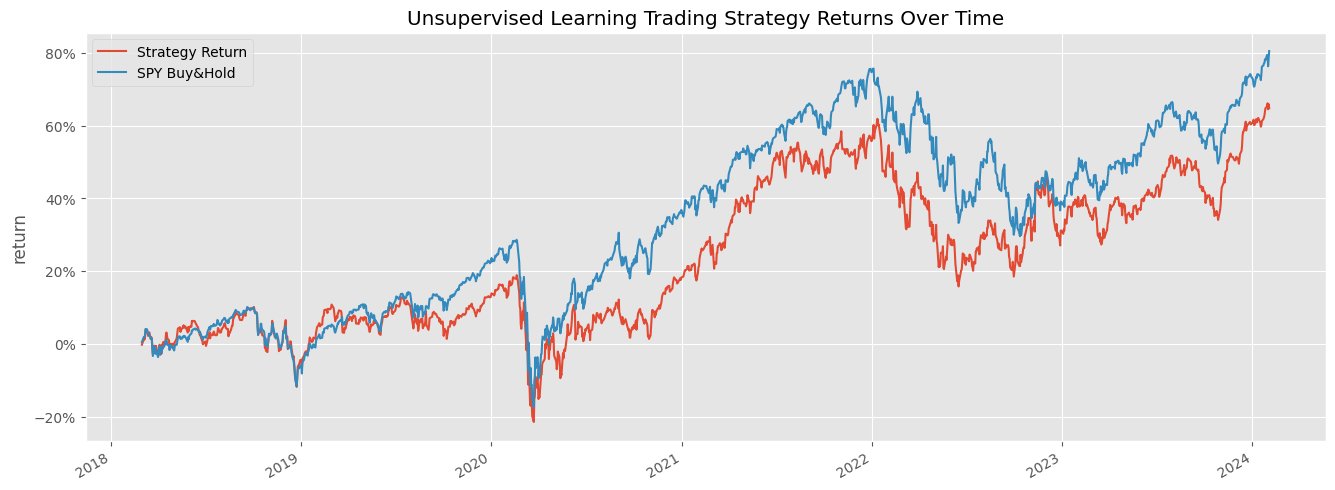

In [79]:
import matplotlib.ticker as mtick
portfolio_df=portfolio_df.merge(spy_ret,
                   left_index=True,
                   right_index=True)

portfolio_cumulative_return= np.exp(np.log1p(portfolio_df).cumsum())-1
portfolio_cumulative_return.plot(figsize=(16,6))
plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylabel('return')
plt.show

# Algo-2

## Simple Algo for trading

In [ ]:
!pip install xlsxwriter
# !pip install stats
import numpy as np
import pandas as pd
import requests
import xlsxwriter
import math
import scipy.stats as stats
from statistics import mean

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 1.8 MB/s eta 0:00:00


In [ ]:
sp500=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
symbols=list(sp500['Symbol'])
symbols[0:5]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN']

In [ ]:
def divide(arr,n):
  for i in range(0,len(arr),n):
    yield arr[i:(i+n)]
symbols_chunks=list(divide(symbols,100))

In [ ]:
data=[]
for symbols in symbols_chunks:
  all=','.join(symbols)
  res=requests.get(f'https://api.iex.cloud/v1/data/core/quote/{all}?filter=symbol,latestPrice,marketCap&token=sk_4c6b80387e4342aeb2751b76288a648a')
  data.append(res.json())
data[1][0:5]

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
def extend_list(data):
  flatten_list=[]
  for i in data:
    flatten_list+=i
  return flatten_list
dataf=extend_list(data)
dataf[0:5]

[{'symbol': 'MMM', 'latestPrice': 93.24, 'marketCap': 51498040623},
 {'symbol': 'AOS', 'latestPrice': 80.33, 'marketCap': 12272458084},
 {'symbol': 'ABT', 'latestPrice': 110.77, 'marketCap': 192303204033},
 {'symbol': 'ABBV', 'latestPrice': 164.22, 'marketCap': 295596000000},
 {'symbol': 'ACN', 'latestPrice': 368.9, 'marketCap': 234249936233}]

In [ ]:
df=pd.DataFrame(dataf)
df['Number of Shares to buy']='N/A'
new_columns={'symbol':'Ticker','latestPrice':'Stock_Price','marketCap':'MarketCapitalization'}
df=df.rename(columns=new_columns)
df.head()

,Ticker,Stock_Price,MarketCapitalization,Number of Shares to buy
0,MMM,93.24,51498040623,N/A
1,AOS,80.33,12272458084,N/A
2,ABT,110.77,192303204033,N/A
3,ABBV,164.22,295596000000,N/A
4,ACN,368.90,234249936233,N/A


In [ ]:
def get_input(prompt:str)->int:
  while True:
    try:
      n=float(input(prompt))
      print(f"Your defined protfolio is: ${n}")
      return n
    except ValueError:
      print("Invalid input!! Please enter a number")

portfolio_size = get_input("Enter the value of your portfolio: ")

Enter the value of your portfolio: 1000000
Your defined protfolio is: $1000000.0


In [ ]:
each_stock=portfolio_size/len(df)
df['Number of Shares to buy']=round(each_stock/df['Stock_Price'])
print(sum(df['Number of Shares to buy']*df['Stock_Price']))
df

1001672.1500000004


,Ticker,Stock_Price,MarketCapitalization,Number of Shares to buy
0,MMM,93.24,51498040623,21.0
1,AOS,80.33,12272458084,25.0
2,ABT,110.77,192303204033,18.0
3,ABBV,164.22,295596000000,12.0
4,ACN,368.90,234249936233,5.0
...,...,...,...,...
498,YUM,129.44,36283095867,15.0
499,ZBRA,254.17,13054070549,8.0
500,ZBH,120.52,25186355290,16.0
501,ZION,44.14,6539287988,45.0


In [ ]:
writer=pd.ExcelWriter('recommende_trades.xlsx',engine='xlsxwriter')
df.to_excel(writer,"Recommended Trades",index=False)

In [ ]:
background_color='#0a0a23'
font_color="#ffffff"

string_format=writer.book.add_format(
    {
        "bg_color":background_color,
        "font_color":font_color,
        "border":1
    }
)

dollar_format=writer.book.add_format(
    {
        "bg_color":background_color,
        "font_color":font_color,
        "border":1,
        "num_format":"$0.00"
    }
)

integer_format=writer.book.add_format(
    {
        "bg_color":background_color,
        "font_color":font_color,
        "border":1,
        "num_format":"0"
    }
)

In [ ]:
columns_format={
    'A':['Tickers',string_format],
    'B':['Stock Price',dollar_format],
    'C':['Market Capitalization',integer_format],
    'D':['Number of shares to buy',integer_format]
}

for i in columns_format:
  writer.sheets['Recommended Trades'].set_column(f'{i}:{i}',18,columns_format[i][1])
  # print(columns_format[i][1])
writer.save()

<ipython-input-19-c2a922e14997>:11: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


## Quantative Momentum Strategy

"Momentum investing" means investing in the stocks that have increased in price the most.

For this project, we're going to build an investing strategy that selects the 50 stocks with the highest price momentum. From there, we will calculate
recommended trades for an equal-weight portfolio of these 50 stocks.

In [ ]:
data_moment=[]
for symbols in symbols_chunks:
  all=','.join(symbols)
  res=requests.get(f'https://api.iex.cloud/v1/data/core/advanced_stats/{all}?token=sk_4c6b80387e4342aeb2751b76288a648a')
  data_moment.append(res.json())
data_momentf=extend_list(data_moment)
data_momentf[0:1]

[{'beta': 1.1141585486705285,
  'totalCash': 5213000000,
  'currentDebt': 15466000000,
  'revenue': 32747000000,
  'grossProfit': 14363000000,
  'totalRevenue': 32747000000,
  'EBITDA': -7579000000,
  'revenuePerShare': 59.29,
  'revenuePerEmployee': 340536.38,
  'debtToEquity': 10.620933219178085,
  'profitMargin': -0.22597489846398144,
  'enterpriseValue': 63877667352,
  'enterpriseValueToRevenue': 1.95,
  'priceToSales': 1.62,
  'priceToBook': 11.36,
  'forwardPERatio': 10.104302092983543,
  'pegRatio': 0.033084657463703586,
  'peHigh': 14.970434619305182,
  'peLow': 10.945529814333264,
  'week52highDate': '2023-02-02',
  'week52lowDate': '2023-10-23',
  'putCallRatio': 1.060200668896321,
  'companyName': '3M Co.',
  'marketcap': 53077667352,
  'week52high': 113.96,
  'week52low': 84.02,
  'week52highSplitAdjustOnly': 120.85,
  'week52highDateSplitAdjustOnly': '2023-02-02',
  'week52lowSplitAdjustOnly': 85.35,
  'week52lowDateSplitAdjustOnly': '2023-10-23',
  'week52change': -0.0975

In [ ]:
momentfull_df=pd.DataFrame(data_momentf)
year1ChangePercent=momentfull_df['year1ChangePercent']
company_name=momentfull_df['companyName']
moment_df=df.copy()
moment_df['1 year change']=year1ChangePercent
moment_df['Company name']=company_name
df2=moment_df.copy()
# moment_df['Number of shares to buy']='N/A'

In [ ]:
moment_df.sort_values('1 year change',ascending=False,inplace=True)
moment_df=moment_df[0:50]
moment_df.head()

,Ticker,Stock_Price,MarketCapitalization,Number of Shares to buy,1 year change,Company name
348,NVDA,613.62,1515641400000,3.0,2.109242,NVIDIA Corp
312,META,390.70,1050983000000,5.0,1.691072,Meta Platforms Inc
79,BLDR,165.32,20391688843,12.0,1.325198,Builders Firstsource Inc
361,PANW,340.24,107277672000,6.0,1.277226,Palo Alto Networks Inc
6,AMD,178.29,285264000000,11.0,1.254618,Advanced Micro Devices Inc.


## Better Strategy

Real-world quantitative investment firms differentiate between "high quality" and "low quality" momentum stocks:

. High-quality momentum stocks show "slow and steady" outperformance over long periods of time
. Low-quality momentum stocks might not show any momentum for a long time, and then surge upwards.

The reason why high-quality momentum stocks are preferred is because low-quality momentum can often be cause by short-term news that is unlikely to be
repeated in the future (such as an FDA approval for a biotechnology company).

In [ ]:
strategy_df=pd.DataFrame()
strategy_df[['1 Month change','3 Month change','6 Month change']]=momentfull_df[['month1ChangePercent','month3ChangePercent','month6ChangePercent']]
hqm_df=pd.concat([strategy_df,df2],axis=1)
hqm_df.drop(columns=['MarketCapitalization','Number of Shares to buy'],inplace=True)

In [ ]:
time_period=["1 Month",
             "3 Month",
             "6 Month",
             "1 year"   ]

In [ ]:
# hqm_df['One Year return percentile']="N/A"
for row in hqm_df.index:
  for time in time_period:
    hqm_df.loc[row,f"{time} return percentile"]=stats.percentileofscore(hqm_df[f'{time} change'],hqm_df.loc[row,f"{time} change"] )
hqm_df.head()

,1 Month change,3 Month change,6 Month change,Ticker,Stock_Price,1 year change,Company name,1 Month return percentile,3 Month return percentile,6 Month return percentile,1 year return percentile
0,-0.096210,0.083137,-0.049851,MMM,93.24,-0.113828,3M Co.,4.572565,30.019881,31.809145,18.290258
1,0.001468,0.234065,0.094859,AOS,80.33,0.373945,A.O. Smith Corp.,50.497018,74.552684,66.799205,85.487078
2,0.050635,0.208213,0.004928,ABT,110.77,0.033641,Abbott Laboratories,84.493042,67.594433,45.924453,44.333996
3,0.091392,0.155768,0.192855,ABBV,164.22,0.180005,Abbvie Inc,96.023857,49.502982,83.896620,68.190855
4,0.047286,0.253709,0.189793,ACN,368.90,0.366363,Accenture plc,83.101392,80.516899,83.499006,85.089463


In [ ]:
hqm_columns=[i+' return percentile' for i in time_period]
hqm_columns
hqm_df['hqm score']=hqm_df[hqm_columns].mean(axis=1)
hqm_df.head()

,1 Month change,3 Month change,6 Month change,Ticker,Stock_Price,1 year change,Company name,1 Month return percentile,3 Month return percentile,6 Month return percentile,1 year return percentile,hqm score
0,-0.096210,0.083137,-0.049851,MMM,93.24,-0.113828,3M Co.,4.572565,30.019881,31.809145,18.290258,21.172962
1,0.001468,0.234065,0.094859,AOS,80.33,0.373945,A.O. Smith Corp.,50.497018,74.552684,66.799205,85.487078,69.333996
2,0.050635,0.208213,0.004928,ABT,110.77,0.033641,Abbott Laboratories,84.493042,67.594433,45.924453,44.333996,60.586481
3,0.091392,0.155768,0.192855,ABBV,164.22,0.180005,Abbvie Inc,96.023857,49.502982,83.896620,68.190855,74.403579
4,0.047286,0.253709,0.189793,ACN,368.90,0.366363,Accenture plc,83.101392,80.516899,83.499006,85.089463,83.051690


In [ ]:
hqm_df.sort_values('hqm score',ascending=False,inplace=True)
hqm_df=hqm_df[0:50].reset_index(drop=True)
# hqm_df.drop(columns=['index'],inplace=True)
hqm_df.head()

,1 Month change,3 Month change,6 Month change,Ticker,Stock_Price,1 year change,Company name,1 Month return percentile,3 Month return percentile,6 Month return percentile,1 year return percentile,hqm score
0,0.206447,0.656536,0.522647,AMD,178.29,1.254618,Advanced Micro Devices Inc.,99.602386,100.000000,99.403579,99.204771,99.552684
1,0.096357,0.486464,0.535147,FICO,1275.55,1.001671,Fair Isaac Corp.,96.819085,98.409543,99.801193,98.210736,98.310139
2,0.154153,0.365414,0.414458,PANW,340.24,1.277226,Palo Alto Networks Inc,99.403579,93.041750,98.409543,99.403579,97.564612
3,0.226152,0.371373,0.342312,NVDA,613.62,2.109242,NVIDIA Corp,99.801193,93.439364,96.421471,100.000000,97.415507
4,0.099807,0.375610,0.525973,ANET,262.47,1.151926,Arista Networks Inc,97.216700,93.638171,99.602386,98.807157,97.316103


In [ ]:
each_stock_portfolio=portfolio_size/len(hqm_df)
hqm_df['Number of shares to buy']=round(each_stock_portfolio/ hqm_df['Stock_Price'])
hqm_df.head()

,1 Month change,3 Month change,6 Month change,Ticker,Stock_Price,1 year change,Company name,1 Month return percentile,3 Month return percentile,6 Month return percentile,1 year return percentile,hqm score,Number of shares to buy
0,0.206447,0.656536,0.522647,AMD,178.29,1.254618,Advanced Micro Devices Inc.,99.602386,100.000000,99.403579,99.204771,99.552684,112.0
1,0.096357,0.486464,0.535147,FICO,1275.55,1.001671,Fair Isaac Corp.,96.819085,98.409543,99.801193,98.210736,98.310139,16.0
2,0.154153,0.365414,0.414458,PANW,340.24,1.277226,Palo Alto Networks Inc,99.403579,93.041750,98.409543,99.403579,97.564612,59.0
3,0.226152,0.371373,0.342312,NVDA,613.62,2.109242,NVIDIA Corp,99.801193,93.439364,96.421471,100.000000,97.415507,33.0
4,0.099807,0.375610,0.525973,ANET,262.47,1.151926,Arista Networks Inc,97.216700,93.638171,99.602386,98.807157,97.316103,76.0


In [ ]:
set_columns=['Company name','Ticker','Stock_Price','Number of shares to buy','hqm score',
             '1 Month change', '3 Month change', '6 Month change','1 year change',
             '1 Month return percentile', '3 Month return percentile',
             '6 Month return percentile', '1 year return percentile']
hqm_df=hqm_df[set_columns]
hqm_df.head()

,Company name,Ticker,Stock_Price,Number of shares to buy,hqm score,1 Month change,3 Month change,6 Month change,1 year change,1 Month return percentile,3 Month return percentile,6 Month return percentile,1 year return percentile
0,Advanced Micro Devices Inc.,AMD,178.29,112.0,99.552684,0.206447,0.656536,0.522647,1.254618,99.602386,100.000000,99.403579,99.204771
1,Fair Isaac Corp.,FICO,1275.55,16.0,98.310139,0.096357,0.486464,0.535147,1.001671,96.819085,98.409543,99.801193,98.210736
2,Palo Alto Networks Inc,PANW,340.24,59.0,97.564612,0.154153,0.365414,0.414458,1.277226,99.403579,93.041750,98.409543,99.403579
3,NVIDIA Corp,NVDA,613.62,33.0,97.415507,0.226152,0.371373,0.342312,2.109242,99.801193,93.439364,96.421471,100.000000
4,Arista Networks Inc,ANET,262.47,76.0,97.316103,0.099807,0.375610,0.525973,1.151926,97.216700,93.638171,99.602386,98.807157


## Quantative Value Strategy
"Value investing" means investing in the stocks that are cheapest relative to common measures of business value (like earnings or assets).

For this project, we're going to build an investing strategy that selects the 50 stocks with the best value metrics. From there, we will calculate recommended
trades for an equal-weight portfolio of these 50 stocks.

In [ ]:
value_data=[]
for symbol in symbols_chunks:
  all=",".join(symbol)
  res=requests.get(f'https://api.iex.cloud/v1/data/core/quote/{all}?filter=symbol,latestPrice,peRatio&token=sk_4c6b80387e4342aeb2751b76288a648a')
  value_data.append(res.json())
value_data=extend_list(value_data)
value_data[0:5]

[{'symbol': 'MMM', 'latestPrice': 93.24, 'peRatio': -6.97},
 {'symbol': 'AOS', 'latestPrice': 80.33, 'peRatio': 40.78},
 {'symbol': 'ABT', 'latestPrice': 110.77, 'peRatio': 37.55},
 {'symbol': 'ABBV', 'latestPrice': 164.22, 'peRatio': 44.99},
 {'symbol': 'ACN', 'latestPrice': 368.9, 'peRatio': 34.22}]

In [ ]:
pe_df=pd.DataFrame(value_data)
pe_df.rename(columns={'symbol':'Ticker','latestPrice':'Stock Price','peRatio':'Price to Earning ratio'},inplace=True)
pe_df

,Ticker,Stock Price,Price to Earning ratio
0,MMM,93.24,-6.97
1,AOS,80.33,40.78
2,ABT,110.77,37.55
3,ABBV,164.22,44.99
4,ACN,368.90,34.22
...,...,...,...
498,YUM,129.44,24.61
499,ZBRA,254.17,28.34
500,ZBH,120.52,53.33
501,ZION,44.14,4.71


### Removing Glamour stocks
Stocks that perform poorly in the value ratio

In [ ]:
pe_df.sort_values('Price to Earning ratio', ascending=False,inplace=True)
pe_df=pe_df[pe_df['Price to Earning ratio']>0][0:50]
pe_df.reset_index(drop=True,inplace=True)
pe_df.head()

,Ticker,Stock Price,Price to Earning ratio
0,VTR,47.55,3995.80
1,CDAY,68.67,2682.42
2,AMD,178.29,1389.63
3,IFF,79.04,960.39
4,WYNN,94.29,320.06


In [ ]:
each_stock_portfolio=portfolio_size/len(pe_df)
pe_df['Number of shares to buy']=round(each_stock_portfolio/pe_df['Stock Price'])
pe_df

,Ticker,Stock Price,Price to Earning ratio,Number of shares to buy
0,VTR,47.55,3995.80,421.0
1,CDAY,68.67,2682.42,291.0
2,AMD,178.29,1389.63,112.0
3,IFF,79.04,960.39,253.0
4,WYNN,94.29,320.06,212.0
5,CLX,139.73,202.07,143.0
6,PANW,340.24,191.15,59.0
7,WELL,87.13,173.60,230.0
8,CAH,104.36,171.42,192.0
9,DXCM,127.42,144.55,157.0
